## Back up

In [5]:
# def station_number(sta, RA_RU,Lmax, K, delta,  TXOP, Imax, print_able):

#     a_j_i=0
#     i=0
#     k=0
#     n=0

    
#     c=0
#     Nn=0
#     j=0
#     Nn_index=0
#     a=0 
#     Sum=0 # "sum" can't be use, replace with "Sum"
#     temp=0
#     temp1=0
#     access_delay=0
#     counter_access_delay=0
#     success_sta=0
#     success_packet=0
#     success_probability=0
#     total_cdf=0
    

#     retrans =Lmax
#     Ri = [0 for _ in range(0,Imax+1)] 
#     M = [0 for _ in range(0,Imax+1)] 
#     M_i_s_C = [0 for _ in range(0,Imax+1)] 
#     M_i  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
#     M_i_s  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
#     M_i_f  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
#     OCW = [0 for _ in range(0,retrans+1) ]
#     # setting of OCWmin/max can be moved to the outside of the function
#     OCWmin = 7
#     OCWmax = 31
#     # setting OCWn
#     OCW[1]=OCWmin
#     for n in range (2, Lmax+1):
#         temp_OCW=2*OCW[n-1]+1
#         if temp_OCW<=OCWmax:
#             OCW[n]=temp_OCW
#         else:
#             OCW[n]=OCW[n-1]
            
#     for i in range (1,Imax+1): #(i=1;i<=Imax;i++):
#         # Ri = Ri-1 - Mi-1,s + Mi-K,s 
#         if i==1 :
#             Ri[i] = RA_RU
#         elif i > 1 and i <= K :
#             Ri[i] = Ri[i-1] - M_i_s_C[i-1]
#         elif (i >= K+1) :
#             Ri[i] = Ri[i-1] - M_i_s_C[i-1] + M_i_s_C[i-K]
        
#         #/** Ri for delta */
#         if i<= (delta+1) :
#             Ri[i] = RA_RU
#         elif (i > (delta+1)) and (i < (1+K*(delta+1))) :
#             Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1]
#         elif (i >= (1 + K*(delta + 1))) :
#             Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1] + M_i_s_C[i-K-K*delta]
#         #//printf("�ɶ�=%d, �i��RU�ƶq=%f, �� %d ���ǿ�\n\n",i,Ri[i],n);

#         # sepcial case 
#         OCWmin=Ri[1]
#         OCWmax=3*Ri[1]  
#         OCW[1]=Ri[1] #let OCWmin = R
        
#         # general case 
#         OCWmin=Ri[1]
#         OCWmax=3*Ri[1]  
#         OCW[1]=Ri[1] #let OCWmin = R
        
#         for n in range (1, Lmax+1):

#             temp_OCW=2*OCW[n-1]
#             if temp_OCW <= OCWmax:
#                 OCW[n]= temp_OCW#2*OCW[n-1] 
#             else:
#                 OCW[n]=OCW[n-1]
#             # end set sepcial case OCW
            
#             #/** initial condition */ 
#             if n == 1 :
#                 if i==1 and Ri[i]>=OCW[n] :
#                     a_j_i = 1
#                 elif i==1 and Ri[i]<OCW[n] :
#                     a_j_i = (Ri[i]+1)/(OCW[n]+1) #remove (float)
#                 elif i>1 :
#                     temp = 0
#                     for c in range (1,i): #c=1;c<=i-1;c++){
#                         temp += Ri[c] #// Sum the Ri
#                     if (OCW[n] - temp) >= Ri[i] : #//
#                         a_j_i = (Ri[i]/(OCW[n]+1)) #remove (float)
#                     elif (OCW[n] - temp) <= 0 :
#                         a_j_i = 0 #// 
#                     else :
#                         a_j_i = (OCW[n]-temp)/(OCW[n]+1) #remove (float)

#                 M_i[i][n] = a_j_i * sta

#             elif n <= i :             #// change to n<=2 ?
#                 #/** Mi[n]=sigma (a_j_i*Mj,F[n-1]) */ 
#                 for k in range (1, i) : #(k=1;k<=(i-1);k++){
                    
#                     if k == i-1 and Ri[i] < OCW[n] :
#                         a_j_i = (Ri[i]+1)/(OCW[n]+1) # remove (float)
                        
#                     elif k == i-1 and Ri[i] >= OCW[n] : #//(i==1 && Ri[i]>=OCW[n]){
#                         a_j_i = 1
                        
#                     elif k < i-1 :
#                         temp1 = 0
                        
#                         for c in range (k+1, i) : #(c=k+1;c<=i-1;c++){   
#                             temp1 += Ri[c]
                            
#                         if OCW[n] - temp1 >= Ri[i] :   
#                             a_j_i = (Ri[i]/(OCW[n]+1)) # remove (float)
                            
#                         elif OCW[n] - temp1 <= 0 :
#                             a_j_i = 0
                            
#                         else :
#                             a_j_i = (OCW[n]-temp1)/(OCW[n]+1) # remove (float)
                            
#                     M_i[i][n] += a_j_i * M_i_f[k][n-1]
                    
#             M[i] += M_i[i][n]
            
#             #/** statistics */  
#         for n in range (1,Lmax+1) : # n=1;n<=Lmax;n++){
#             if Ri[i] != 0: #avoid Ri=0
#                 M_i_s[i][n] = M_i[i][n] * math.exp(-M[i]/Ri[i])  # remove (double)
#             M_i_f[i][n] = M_i[i][n] - M_i_s[i][n]       # remove (double)
#             M_i_s_C[i] += M_i_s[i][n]

# 		#/** performance metric */  
# 		#/** success probability */ 
#         success_packet += M_i_s_C[i]*K
#         success_sta += M_i_s_C[i]

#         if (i==Imax-1 and print_able==1) :
#             success_probability = success_packet/(sta*K) 
            
# 		#/** access delay */
#         counter_access_delay += M_i_s_C[i]* float( K*i + ((K-1)*K)/2)
    
#         if (i==Imax-1 and print_able==1) :
#             access_delay=(TXOP*counter_access_delay)/(success_sta*K)

#     #/** Imax */
#     Nn_index = 0
#     Imax = 0
#     for n in range (1,Lmax+1) : #(n=1;n<=Lmax;n++){
#         Sum = 0
#         Nn = 0
#         for c in range (Nn_index+1, 60+1) : #(c=(Nn_index+1);c<=60;c++){
#             if Sum <= OCW[n] :
#                 Nn += 1
#                 Nn_index += 1
#                 Sum += Ri[c]
# #            //printf("Nn_index=%d, Nn=%d, Sum=%f\n\n",Nn_index,Nn,Sum);
#         Imax += Nn
#     Imax = Imax + (K-1)
    
#     #Throughput 
#     through_put= success_packet/Imax
# # 	//printf("Imax=%d\n\n\n",Imax);
#     return Imax,success_probability,access_delay,through_put
# #end def

In [6]:
# Back up 找出給定R下的所有OCWmin,OCWmax,Lmax組合和T
OCWmin = [7,15,31,63,127]
OCWmax = [7,15,31,63,127]
Lmax = [1,2,3,4,5]
R = 36
temp_min = 0
temp_max = 0
temp_Lmax = 0
list = []

for i in Lmax:
    for x in OCWmin:
        for y in OCWmax:
            OCW = [0 for _ in range(0,i+1) ]
            OCW[1] = x
            for n in range (2, i+1):
                temp_OCW=2*OCW[n-1]+1
                if temp_OCW<=y:
                    OCW[n]=temp_OCW
                else:
                    OCW[n]=OCW[n-1]
                  
                    
            if (not((temp_Lmax == i)&(temp_max == OCW[i])&(temp_min == OCW[1]))):
                T = 0
                for z in range(1,i+1):
                    T = T + math.ceil(OCW[z]/R)
                print("Lmax: ",i,"\tOCWmin: ",OCW[1],"\tOCWmax: ",OCW[i], "\tT/Imax: ", T)
                list.append([i,OCW[1],OCW[i],T])
            temp_max = OCW[i]
            temp_min = OCW[1]
            temp_Lmax = i
list.sort(key = lambda s: s[3])
            
       

Lmax:  1 	OCWmin:  7 	OCWmax:  7 	T/Imax:  1
Lmax:  1 	OCWmin:  15 	OCWmax:  15 	T/Imax:  1
Lmax:  1 	OCWmin:  31 	OCWmax:  31 	T/Imax:  1
Lmax:  1 	OCWmin:  63 	OCWmax:  63 	T/Imax:  2
Lmax:  1 	OCWmin:  127 	OCWmax:  127 	T/Imax:  4
Lmax:  2 	OCWmin:  7 	OCWmax:  7 	T/Imax:  2
Lmax:  2 	OCWmin:  7 	OCWmax:  15 	T/Imax:  2
Lmax:  2 	OCWmin:  15 	OCWmax:  15 	T/Imax:  2
Lmax:  2 	OCWmin:  15 	OCWmax:  31 	T/Imax:  2
Lmax:  2 	OCWmin:  31 	OCWmax:  31 	T/Imax:  2
Lmax:  2 	OCWmin:  31 	OCWmax:  63 	T/Imax:  3
Lmax:  2 	OCWmin:  63 	OCWmax:  63 	T/Imax:  4
Lmax:  2 	OCWmin:  63 	OCWmax:  127 	T/Imax:  6
Lmax:  2 	OCWmin:  127 	OCWmax:  127 	T/Imax:  8
Lmax:  3 	OCWmin:  7 	OCWmax:  7 	T/Imax:  3
Lmax:  3 	OCWmin:  7 	OCWmax:  15 	T/Imax:  3
Lmax:  3 	OCWmin:  7 	OCWmax:  31 	T/Imax:  3
Lmax:  3 	OCWmin:  15 	OCWmax:  15 	T/Imax:  3
Lmax:  3 	OCWmin:  15 	OCWmax:  31 	T/Imax:  3
Lmax:  3 	OCWmin:  15 	OCWmax:  63 	T/Imax:  4
Lmax:  3 	OCWmin:  31 	OCWmax:  31 	T/Imax:  3
Lmax:  3 	OCWmin:

In [7]:
list.sort(key = lambda s: s[3])
for i in range(len(list)):
    print(list[i])

[1, 7, 7, 1]
[1, 15, 15, 1]
[1, 31, 31, 1]
[1, 63, 63, 2]
[2, 7, 7, 2]
[2, 7, 15, 2]
[2, 15, 15, 2]
[2, 15, 31, 2]
[2, 31, 31, 2]
[2, 31, 63, 3]
[3, 7, 7, 3]
[3, 7, 15, 3]
[3, 7, 31, 3]
[3, 15, 15, 3]
[3, 15, 31, 3]
[3, 31, 31, 3]
[1, 127, 127, 4]
[2, 63, 63, 4]
[3, 15, 63, 4]
[4, 7, 7, 4]
[4, 7, 15, 4]
[4, 7, 31, 4]
[4, 15, 15, 4]
[4, 15, 31, 4]
[4, 31, 31, 4]
[3, 31, 63, 5]
[4, 7, 63, 5]
[5, 7, 7, 5]
[5, 7, 15, 5]
[5, 7, 31, 5]
[5, 15, 15, 5]
[5, 15, 31, 5]
[5, 31, 31, 5]
[2, 63, 127, 6]
[3, 63, 63, 6]
[4, 15, 63, 6]
[3, 31, 127, 7]
[4, 31, 63, 7]
[5, 7, 63, 7]
[2, 127, 127, 8]
[4, 15, 127, 8]
[4, 63, 63, 8]
[5, 15, 63, 8]
[5, 7, 127, 9]
[5, 31, 63, 9]
[3, 63, 127, 10]
[5, 63, 63, 10]
[4, 31, 127, 11]
[3, 127, 127, 12]
[5, 15, 127, 12]
[4, 63, 127, 14]
[5, 31, 127, 15]
[4, 127, 127, 16]
[5, 63, 127, 18]
[5, 127, 127, 20]


In [8]:
Ps_0=[]
Ps_0.append([2, 63, 127, 6])
Ps_1=[]
Ps_1.append([4, 15, 63, 6])

In [9]:
T = 6
M = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

for i in range(len(list)):
    if list[i][3] == T and list[i][0] == 4:
        for n in range(len(M)):
            the_Imax = 0
            the_Ps=0
            the_Da=0
            the_Tp=0
            the_Imax,the_Ps,the_Da,the_Tp = station_number( M[n], R, list[i][0], 1, 0, 5.681,list[i][3],1,list[i][1],list[i][2])
            print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)
            Ps_1.append(the_Ps)
    else:
        continue

Ps:  0.9999999751012641 	 Da:  7.186766475278978 	 Imax:  6
Ps:  0.9999810612446908 	 Da:  8.84669474052073 	 Imax:  6
Ps:  0.999391099155137 	 Da:  10.753752049177606 	 Imax:  6
Ps:  0.9945566972761085 	 Da:  12.820030782424812 	 Imax:  6
Ps:  0.9760786245945066 	 Da:  14.863046709202697 	 Imax:  6
Ps:  0.9334793748588653 	 Da:  16.689569349497116 	 Imax:  6
Ps:  0.864488151940774 	 Da:  18.211481088519747 	 Imax:  6
Ps:  0.7769493584538251 	 Da:  19.45143864892612 	 Imax:  6
Ps:  0.6825885417235722 	 Da:  20.478600839070417 	 Imax:  6
Ps:  0.5910294904451825 	 Da:  21.36070718496758 	 Imax:  6
Ps:  0.5078443678648715 	 Da:  22.14785073575236 	 Imax:  6
Ps:  0.4352212001849041 	 Da:  22.872538588280097 	 Imax:  6
Ps:  0.37327220968392943 	 Da:  23.55425196562834 	 Imax:  6
Ps:  0.3210875423217795 	 Da:  24.20389969312312 	 Imax:  6
Ps:  0.2773818551724641 	 Da:  24.827093262667304 	 Imax:  6
Ps:  0.2408321151024293 	 Da:  25.42632039388589 	 Imax:  6
Ps:  0.21022909774161863 	 Da:  26

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

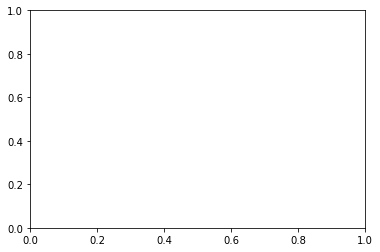

In [10]:
#Ps

plt.plot(M,Ps_0[1:], '-',alpha = 0,color = 'purple',label = "[Lmax, OCWmin, OCWmax, Imax]")
plt.plot(M,Ps_0[1:], '-',color = 'blue',label = Ps_0[0])
plt.plot(M,Ps_1[1:], '-',color = 'green',label = Ps_1[0])
# plt.plot(M,Ps_2[1:], '-',color = 'green',label = Ps_2[0])
# plt.plot(M,Ps_3[1:], '-',color = 'purple',label = Ps_3[0])
# plt.plot(M,Ps_4[1:], '-',color = 'pink',label = Ps_4[0])


#plt.xscale('log')
plt.title('$R = $' + str(R) +', $T(I_{max}) = $' + str(8) , fontsize = 18)
plt.xlabel("$M$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.7), fontsize = 12)
plt.axis([10,200,0,1.1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(M)
# plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# 0. Analytical code

In [11]:
import numpy as np
import random
import sympy 
import scipy.stats as st
import scipy.special
import pandas as pd
import csv
import math
from decimal import *
from mpl_toolkits.mplot3d import Axes3D
import multiprocessing as mp
import datetime

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm
from itertools import repeat

from shapely.geometry import LineString

from matplotlib import cm
from numpy import linspace
import itertools

from copy import deepcopy

In [12]:
def station_number(sta, RA_RU,Lmax, K, delta,  TXOP, Imax, print_able, min, max):

    a_j_i=0
    i=0
    k=0
    n=0

    c=0
    Nn=0
    j=0
    Nn_index=0
    a=0 
    Sum=0 # "sum" can't be use, replace with "Sum"
    temp=0
    temp1=0
    access_delay=0
    counter_access_delay=0
    success_sta=0
    success_packet=0
    success_probability=0
    total_cdf=0
    Imax = Imax + 1
    retrans =Lmax
    Ri = [0 for _ in range(0,Imax+1)] 
    M  = [0 for _ in range(0,Imax+1)] 
    M_i_s_C = [0 for _ in range(0,Imax+1)] 
    M_i    = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    M_i_s  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    M_i_f  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    OCW = [0 for _ in range(0,retrans+1) ]
    
    # setting of OCWmin/max can be moved to the outside of the function
    OCWmin = min
    OCWmax = max
    # setting OCWn
    OCW[1]=OCWmin
    # setting all OCW value     
    for n in range (2, Lmax+1):
        temp_OCW=2*OCW[n-1]+1
        if temp_OCW<=OCWmax:
            OCW[n]=temp_OCW
        else:
            OCW[n]=OCW[n-1]
    # 
    for i in range (1,Imax+1): #(i=1;i<=Imax;i++):
        # Ri = Ri-1 - Mi-1,s + Mi-K,s 
        if i==1 :
            Ri[i] = RA_RU
        elif i > 1 and i <= K :
            Ri[i] = Ri[i-1] - M_i_s_C[i-1]
        elif (i >= K+1) :
            Ri[i] = Ri[i-1] - M_i_s_C[i-1] + M_i_s_C[i-K]
        
        #/** Ri for delta */
        if i<= (delta+1) :
            Ri[i] = RA_RU
        elif (i > (delta+1)) and (i < (1+K*(delta+1))) :
            Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1]
        elif (i >= (1 + K*(delta + 1))) :
            Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1] + M_i_s_C[i-K-K*delta]

        for n in range (1, Lmax+1):
            
            #/** initial condition */ 
            if n == 1 :
                if i==1 and Ri[i]>=OCW[n] :
                    a_j_i = 1
                elif i==1 and Ri[i]<OCW[n] :
                    a_j_i = (Ri[i]+1)/(OCW[n]+1) #remove (float)
                elif i>1 :
                    temp = 0
                    for c in range (1,i): #c=1;c<=i-1;c++){
                        temp += Ri[c] #// Sum the Ri
                    if (OCW[n] - temp) >= Ri[i] : #//
                        a_j_i = (Ri[i]/(OCW[n]+1)) #remove (float)
                    elif (OCW[n] - temp) <= 0 :
                        a_j_i = 0 #// 
                    else :
                        a_j_i = (OCW[n]-temp)/(OCW[n]+1) #remove (float)

                M_i[i][n] = a_j_i * sta

            elif n <= i :             #// change to n<=2 ?
                #/** Mi[n]=sigma (a_j_i*Mj,F[n-1]) */ 
                for k in range (1, i) : #(k=1;k<=(i-1);k++){
                    
                    if k == i-1 and Ri[i] < OCW[n] :
                        a_j_i = (Ri[i]+1)/(OCW[n]+1) # remove (float)
                        
                    elif k == i-1 and Ri[i] >= OCW[n] : #//(i==1 && Ri[i]>=OCW[n]){
                        a_j_i = 1
                        
                    elif k < i-1 :
                        temp1 = 0
                        
                        for c in range (k+1, i) : #(c=k+1;c<=i-1;c++){   
                            temp1 += Ri[c]
                            
                        if OCW[n] - temp1 >= Ri[i] :   
                            a_j_i = (Ri[i]/(OCW[n]+1)) # remove (float)
                            
                        elif OCW[n] - temp1 <= 0 :
                            a_j_i = 0
                            
                        else :
                            a_j_i = (OCW[n]-temp1)/(OCW[n]+1) # remove (float)
                            
                    M_i[i][n] += a_j_i * M_i_f[k][n-1]
                    
            M[i] += M_i[i][n]
            
            #/** statistics */  
        for n in range (1,Lmax+1) : # n=1;n<=Lmax;n++){
            if Ri[i] != 0: #avoid Ri=0
                M_i_s[i][n] = M_i[i][n] * math.exp(-M[i]/Ri[i])  # remove (double)
            M_i_f[i][n] = M_i[i][n] - M_i_s[i][n]       # remove (double)
            M_i_s_C[i] += M_i_s[i][n]


  #/** performance metric */  
  #/** success probability */ 
        success_packet += M_i_s_C[i]*K
        success_sta += M_i_s_C[i]
#         success_probability = success_packet/(sta*K) # remove (double)
        if (i==Imax-1 and print_able==1) :
            success_probability = success_packet/(sta*K) # remove (double)

        counter_access_delay += M_i_s_C[i]* float( K*i + ((K-1)*K)/2)
    
        if (i==Imax-1 and print_able==1) :

            access_delay=(TXOP*counter_access_delay)/(success_sta*K)# remove (double)

    #/** Imax */
    Imax = 0
    for z in range(1,Lmax+1):
        Imax = Imax + math.ceil(OCW[z]/R)
    
    #Throughput 
    through_put= success_packet/Imax

    return Imax,success_probability,access_delay,through_put


In [13]:
def all_combination(RA_RU,Lmax_list, min_list, max_list):
    OCWmin =  min_list #[7,15,31,63,127]
    OCWmax =  max_list #[7,15,31,63,127]
    Lmax = Lmax_list #[1,2,3,4,5]
    R = RA_RU
    temp_min = 0
    temp_max = 0
    temp_Lmax = 0
    list = []

    for i in Lmax:
        for x in OCWmin:
            for y in OCWmax:
                OCW = [0 for _ in range(0,i+1) ]
                OCW[1] = x
                for n in range (2, i+1):
                    temp_OCW=2*OCW[n-1]+1
                    if temp_OCW<=y:
                        OCW[n]=temp_OCW
                    else:
                        OCW[n]=OCW[n-1]


                if (not((temp_Lmax == i)&(temp_max == OCW[i])&(temp_min == OCW[1]))):
                    T = 0
                    for z in range(1,i+1):
                        T = T + math.ceil(OCW[z]/R)
                    #print("Lmax: ",i,"\tOCWmin: ",OCW[1],"\tOCWmax: ",OCW[i], "\tT/Imax: ", T)
                    list.append([i,OCW[1],OCW[i],T])
                temp_max = OCW[i]
                temp_min = OCW[1]
                temp_Lmax = i
    list.sort(key = lambda s: s[3])
    return list

In [14]:
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 10, 9, 1, 1, 0, 5.681,1,1,7,7)
print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 10, 9, 1, 1, 0, 5.681,2,1,15,15)
print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 10, 9, 1, 1, 0, 5.681,1,1,15,15)
print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

Ps:  0.32919298780790557 	 Da:  5.681 	 Imax:  1
Ps:  0.559310104199714 	 Da:  8.19200372944771 	 Imax:  1
Ps:  0.3120948678745476 	 Da:  5.681 	 Imax:  1


## Step1 analytical model (it can compare with simulation result)

In [15]:
# 給定R來看有哪些組合
R = 37
list_main = []
list_main = all_combination(R,[1,2,3,4,5], [7,15,31,63,127], [7,15,31,63,127])
print("[Lmax, OCWmin, OCWmax, T/Imax]")
for i in range(len(list_main)):
    print(list_main[i])

[Lmax, OCWmin, OCWmax, T/Imax]
[1, 7, 7, 1]
[1, 15, 15, 1]
[1, 31, 31, 1]
[1, 63, 63, 2]
[2, 7, 7, 2]
[2, 7, 15, 2]
[2, 15, 15, 2]
[2, 15, 31, 2]
[2, 31, 31, 2]
[2, 31, 63, 3]
[3, 7, 7, 3]
[3, 7, 15, 3]
[3, 7, 31, 3]
[3, 15, 15, 3]
[3, 15, 31, 3]
[3, 31, 31, 3]
[1, 127, 127, 4]
[2, 63, 63, 4]
[3, 15, 63, 4]
[4, 7, 7, 4]
[4, 7, 15, 4]
[4, 7, 31, 4]
[4, 15, 15, 4]
[4, 15, 31, 4]
[4, 31, 31, 4]
[3, 31, 63, 5]
[4, 7, 63, 5]
[5, 7, 7, 5]
[5, 7, 15, 5]
[5, 7, 31, 5]
[5, 15, 15, 5]
[5, 15, 31, 5]
[5, 31, 31, 5]
[2, 63, 127, 6]
[3, 63, 63, 6]
[4, 15, 63, 6]
[3, 31, 127, 7]
[4, 31, 63, 7]
[5, 7, 63, 7]
[2, 127, 127, 8]
[4, 15, 127, 8]
[4, 63, 63, 8]
[5, 15, 63, 8]
[5, 7, 127, 9]
[5, 31, 63, 9]
[3, 63, 127, 10]
[5, 63, 63, 10]
[4, 31, 127, 11]
[3, 127, 127, 12]
[5, 15, 127, 12]
[4, 63, 127, 14]
[5, 31, 127, 15]
[4, 127, 127, 16]
[5, 63, 127, 18]
[5, 127, 127, 20]


In [17]:
# # Read simulation data
# simple_test = pd.read_csv('simpletest_c_sim_k1.csv')
# sim_1 = simple_test

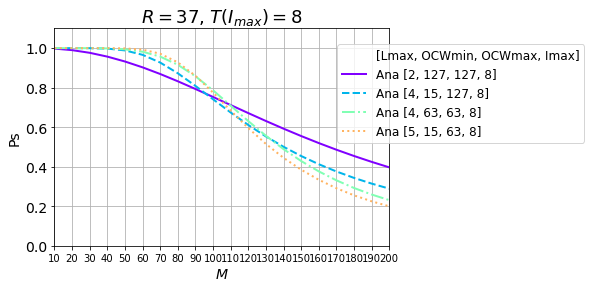

In [19]:
# 檢查所有的組合在給定條件下(R,T,M)的表現 (可以一次觀測所有T下不同組合的表現)

# color=iter(cm.rainbow(np.linspace(0,1,len(T_1)+1)))
line=iter(  ['-','--','-.',':']*30)
mark =iter( ['o','^','*','v','s','p','h','<','>','s','p','h','x']*30)


for T in range(list_main[0][3],list_main[-1][3]+1):
    x=0 
    y=0

    for i in range(len(list_main)):
        if list_main[i][3] == T:
            x= x+1
        else:
            continue

    Ps_list = [[] for i in repeat(None, x)]

    for i in range(len(list_main)):
        if list_main[i][3] == T:
            Ps_list[y].append(list_main[i])
            y = y+1
        else:
            continue
            
#     if (len(Ps_list)>0):
#         print(Ps_list)    


    M = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

    for i in range(len(Ps_list)):
        for n in range(len(M)):
            the_Imax = 0
            the_Ps=0
            the_Da=0
            the_Tp=0
            the_Imax,the_Ps,the_Da,the_Tp = station_number( M[n], R, Ps_list[i][0][0], 1, 0, 5.681,Ps_list[i][0][3],1,Ps_list[i][0][1],Ps_list[i][0][2])
#             print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)
            Ps_list[i].append(the_Ps)

    #print(Ps_list) 
#     if (len(Ps_list)>1):
    if (len(Ps_list)>0 and T == 8):
        plt.plot(M,Ps_list[0][1:], '-',alpha = 0,color = 'purple',label = "[Lmax, OCWmin, OCWmax, Imax]")
        
        color=iter(cm.rainbow(np.linspace(0,1,len(Ps_list)+1)))
        for i in range(len(Ps_list)):
#             plt.plot(M,Ps_list[i][1:], '-',label = "Ana "+ str(Ps_list[i][0]))

            c=next(color)
            l = next(line)
            plt.plot(M,Ps_list[i][1:], '-', color =c,linestyle = l, linewidth = 2,label = "Ana "+ str(Ps_list[i][0]))
#             plt.plot(M_1,averaged_Ps[i][1], '-', color =c,linestyle = l, linewidth = 2,label = "Ana "+', Total  $Ps$' +', when $T2 = $' +str(G2_Ps[i][0])+', $T1 = $'+ str(T1) )            
            
        # Compare with simulation
        m =next(mark)
#         plt.plot(sim_1.M[0:20],sim_1.Ps[0:20], '*',color = 'black',markersize=6,marker = m,label = 'sim ['+str(sim_1.Lmax[0])+", "+str(sim_1.OCWmin[0])+", "+str(sim_1.OCWmax[0])+", "+str(sim_1.Imax[0])+"]")
#         m =next(mark) 
#         plt.plot(sim_1.M[20:40],sim_1.Ps[20:40], '*',color = 'black',markersize=6,marker = m,label = 'sim ['+str(sim_1.Lmax[20])+", "+str(sim_1.OCWmin[20])+", "+str(sim_1.OCWmax[20])+", "+str(sim_1.Imax[20])+"]")
#         m =next(mark) 
#         plt.plot(sim_1.M[40:60],sim_1.Ps[40:60], '*',color = 'black',markersize=6,marker = m,label = 'sim ['+str(sim_1.Lmax[40])+", "+str(sim_1.OCWmin[40])+", "+str(sim_1.OCWmax[40])+", "+str(sim_1.Imax[45])+"]")
#         m =next(mark) 
#         plt.plot(sim_1.M[60:80],sim_1.Ps[60:80], '*',color = 'black',markersize=6,marker = m,label = 'sim ['+str(sim_1.Lmax[60])+", "+str(sim_1.OCWmin[60])+", "+str(sim_1.OCWmax[60])+", "+str(sim_1.Imax[61])+"]")
#         m =next(mark) 
#         plt.plot(sim_1.M[80:100],sim_1.Ps[80:100], '*',color = 'black',markersize=6,marker = m,label = 'sim ['+str(sim_1.Lmax[80])+", "+str(sim_1.OCWmin[80])+", "+str(sim_1.OCWmax[80])+", "+str(sim_1.Imax[81])+"]")


        
               
        
        plt.title('$R = $' + str(R) +', $T(I_{max}) = $' + str(T) , fontsize = 18)
        plt.xlabel("$M$", fontsize = 14)
        plt.ylabel("Ps", fontsize = 14)
        plt.grid(True, which="both")
        plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.7), fontsize = 12)
        plt.axis([10,200,0,1.1]) #x spacing,x max, y spcaing, y max
        plt.rcParams["figure.figsize"] = (8,6)
        plt.xticks(M)
        plt.yticks(fontsize = 14)
        plt.show()

In [ ]:
print(sim_1.M)

## Step2 analytical model

In [ ]:
# 給定R來看有哪些組合(只留下極端組合 (Lmax最高 && OCWmax最小)和(Lmax最小 && OCWmax最大))
R = 37
list_main = []
list_main = all_combination(R,[1,2,3,4,5], [7,15,31,63,127], [7,15,31,63,127])
list1 = []



# 挑出有3組以上(Lmax, OCWmin, OCWmax)組合的T/Imax
data = np.array(list_main)
x = 1
for x in range(1,100):      
    data1= np.array(np.where(data[:,3] == x)).flatten()
    if data1.size>=3:
        list1.append(data1.tolist())
#print(list1)


# 留下(Lmax最高 && OCWmax最小)
temp_maxLmax = 1
temp_minOCWmax = 127
temp_nmax = 0
list2 = []
for i in range(len(list1)):
    for n in list1[i]:
        if list_main[n][0] >= temp_maxLmax and list_main[n][2] <= temp_minOCWmax:
            temp_maxLmax = list_main[n][0]
            temp_minOCWmax = list_main[n][2]
            temp_nmax = n
        else:
            continue
    list2.append(temp_nmax)
    temp_maxLmax = 1
    temp_minOCWmax = 127
    temp_nmax = 0
# print(list2)

# 留下(Lmax最小 && OCWmax最大)
temp_minLmax = 5
temp_maxOCWmax = 7
temp_nmin = 0
list3 = []
for i in range(len(list1)):
    for n in list1[i]:
        if list_main[n][0] <= temp_minLmax and list_main[n][2] >= temp_maxOCWmax:
            temp_minLmax = list_main[n][0]
            temp_maxOCWmax = list_main[n][2]
            temp_nmin = n
        else:
            continue
    list3.append(temp_nmin)
    temp_minLmax = 5
    temp_maxOCWmax = 7
    temp_nmin = 0
# print(list3)


# 更新list，3組以上的只留下極端組合，每種R Imax只會剩下1或2組
list1 = [b for a in list1 for b in a]
for i in range(len(list2)):
    list1.remove(list2[i])
for i in range(len(list3)):
    list1.remove(list3[i]) 
# print(list1)
list_main = [list_main[i] for i in range(len(list_main)) if i not in list1]

# 刪除例外狀況: 過濾成兩組以下後有相同Ps表現的需合併成一組(把Lmax相同且OCWn都小於R導致結果都相同的組合只留一個)
if list_main[0][0] == list_main[1][0] ==1 and list_main[0][2] < R and list_main[1][2] < R:
    list_main.pop(0)

print("[Lmax, OCWmin, OCWmax, Imax]")
for i in range(len(list_main)):
    print(list_main[i])    

In [ ]:
# Record all fixed R and Imax下的交叉點
list4 = []

for T in range(list_main[0][3],list_main[-1][3]+1):
    x=0 
    y=0

    for i in range(len(list_main)):
        if list_main[i][3] == T:
            x= x+1
        else:
            continue

    Ps_list = [[] for i in repeat(None, x)]

    for i in range(len(list_main)):
        if list_main[i][3] == T:
            Ps_list[y].append(list_main[i])
            y = y+1
        else:
            continue

    M = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

    for i in range(len(Ps_list)):
        for n in range(len(M)):
            the_Imax = 0
            the_Ps=0
            the_Da=0
            the_Tp=0
            the_Imax,the_Ps,the_Da,the_Tp = station_number( M[n], R, Ps_list[i][0][0], 1, 0, 5.681,Ps_list[i][0][3],1,Ps_list[i][0][1],Ps_list[i][0][2])
            Ps_list[i].append(the_Ps)

# 找有2組的R Imax其交叉點
            
    if (len(Ps_list)>1):

#         for i in range(len(Ps_list)):
#             plt.plot(M,Ps_list[i][1:], '-',label = "Ana "+ str(Ps_list[i][0]))

        first_line = LineString(np.column_stack((M, Ps_list[0][1:])))
        second_line = LineString(np.column_stack((M, Ps_list[1][1:])))
        intersection = first_line.intersection(second_line)
        if intersection.geom_type == 'MultiPoint':
            # 處理例外狀況，理論上都只會形成一個交叉點，在R=36 Imax=9會因python計算導致有兩個交點(手動去除錯誤的交叉點)
            x, y = LineString(intersection).xy
            list5 = []
            list5.append(x.tolist())
            list5 = [b for a in list5 for b in a]
            list5.pop(0)
            list4.append(list5)
        elif intersection.geom_type == 'Point':
            x, y = intersection.xy
            list4.append(x.tolist())


list4 = [b for a in list4 for b in a]

print(list4)


In [ ]:
# Record all fixed R and Imax's intersection into list

print("[Lmax, OCWmin, OCWmax, Imax, intersection]")
buffer = 0       
x = 0
for i in range(len(list_main)):
    if list_main[i][3] == buffer:
        list_main[i].append(list4[x])
        x = x+1
        buffer = list_main[i][3]
    else:
        buffer = list_main[i][3]
        list_main[i].append(0)
for i in range(len(list_main)):
    print(list_main[i])    


In [ ]:
# 單看Tj相同，另一群Tj要使用哪種會有較好表現的情況
## 過濾: 證明找到最佳Tj 另一群Tj應該用越大越好或是和最佳Tj相同

Tj = 15
# 設立觀察時間: T (unit: slot)
T = 20

# 根據觀察時間給定可接受的總Imax範圍
Imax_min = T
Imax_max = int(1.1*T)
Imax = list(range(Imax_min,Imax_max+1))
print("Total afforded Imax: ",Imax)

# 給定T_1時間(未過濾)
T_1 = list(range(1,T))
# T_1不可以剛好等於T 2022/6/21
# T_1 = list(range(1,Imax_max))

# print("T_1:", T_1)

# 設立T_2時間(未過濾)
T_2_buffer = []
for i in range(len(T_1)):
    temp = (np.array(Imax)-T_1[i]).tolist()
    T_2_buffer.append([T_1[i],temp])
print("Unfliter T_1 with T_2", T_2_buffer)

# 過濾留下給定R下組合得出來的Imax

## 先過濾不符合的T_1 & 刪除該T_1對應的T_2
list_compare = [list_main[i][3] for i in range(len(list_main))]
# T_1 = [l for l in list_compare if l in T_1]
### 額外過濾T1 = 1 or 2狀況
T_1 = [l for l in list_compare if l in T_1 if l !=1 if l !=2]
T_1 = (np.unique(np.array(T_1))).tolist()
print("Filted T_1: ", T_1)

T_2 = []
for i in range(len(T_2_buffer)):
    if T_2_buffer[i][0] in T_1:
        T_2.append(T_2_buffer[i][1])
    else:
        continue


## 過濾剩餘符合的T_1中不符合的T_2
for i in range(len(T_2)):
    T_2[i]=[l for l in list_compare if l in T_2[i]]
    T_2[i]= (np.unique(np.array(T_2[i]))).tolist()
print("Filted T_2: ", T_2)

### 先合併T1 T2 list好處理剩餘狀況 
T_1_2 = []
for i in range(len(T_2)):
    T_1_2.append([T_1[i],T_2[i]])
print("Filted T_1_2: ", T_1_2)

T_1 = []
T_2 = []
for i in range(len(T_1_2)):
    for k in range(len(T_1_2[i][1])):
        if T_1_2[i][1][k] == Tj:
            T_1.append(T_1_2[i][0])
            T_2.append([T_1_2[i][1][k]])

print("new Filted T_1: ", T_1)    
print("new Filted T_2: ", T_2)

color_count = [b for a in T_2 for b in a]
print(len(color_count))

In [ ]:


## 小的Tj擺第1群 較大的Tj擺第二群

## 找到最佳Tj 另一群Tj應該用越大越好或是和最佳Tj相同

## 過濾後只比較 T1較小  T2較大 且OCW較大 Lmax較小的組合

In [ ]:
# 根據給定的T、總Imax範圍和R，先過濾並留下符合的$\sum_{j=0}^{j=1} T_j$組合
## 過濾: 只留下有OCW較大 Lmax較小 Tj組合的版本
# 設立觀察時間: T (unit: slot)
T = 20

# 根據觀察時間給定可接受的總Imax範圍
Imax_min = T
Imax_max = int(1.1*T)
Imax = list(range(Imax_min,Imax_max+1))
print("Total afforded Imax: ",Imax)

# 給定T_1時間(未過濾)
T_1 = list(range(1,T))
# print("T_1:", T_1)

# 設立T_2時間(未過濾)
T_2_buffer = []
for i in range(len(T_1)):
    temp = (np.array(Imax)-T_1[i]).tolist()
    T_2_buffer.append([T_1[i],temp])
print("Unfliter T_1 with T_2", T_2_buffer)

# 過濾留下給定R下組合得出來的Imax

## 先過濾不符合的T_1 & 刪除該T_1對應的T_2
list_compare = [list_main[i][3] for i in range(len(list_main))]
# T_1 = [l for l in list_compare if l in T_1]
### 額外過濾T1 = 1 or 2狀況
T_1 = [l for l in list_compare if l in T_1]
T_1 = (np.unique(np.array(T_1))).tolist()
print("Filted T_1: ", T_1)

T_2 = []
for i in range(len(T_2_buffer)):
    if T_2_buffer[i][0] in T_1:
        T_2.append(T_2_buffer[i][1])
    else:
        continue


## 過濾剩餘符合的T_1中不符合的T_2 (step 2-5)
for i in range(len(T_2)):
    T_2[i]=[l for l in list_compare if l in T_2[i]]
    T_2[i]= (np.unique(np.array(T_2[i]))).tolist()
print("Filted T_2: ", T_2)

### 先合併T1 T2 list好處理剩餘狀況 (step 2-5)
T_1_2 = []
for i in range(len(T_2)):
    T_1_2.append([T_1[i],T_2[i]])
print("Filted T_1_2: ", T_1_2)

T_1 = []
T_2 = []

## 過濾只留下T2 >= T1
for i in range(len(T_1_2)):
    for k in range(len(T_1_2[i][1])):
        if T_1_2[i][0] <= T_1_2[i][1][k]:
            T_1.append(T_1_2[i][0])
            T_2.append([T_1_2[i][1][k]])

print("new Filted T_1: ", T_1)    
print("new Filted T_2: ", T_2)

# list_compare2 = [list_main[i] for i in range(len(list_main)) if list_main[i][3] ==  ]

## 過濾T2 只留下OCW較大 Lmax較小
compare_T2 = [b for a in T_2 for b in a]
compare_T2.sort()
compare_T2 = (np.unique(np.array(compare_T2))).tolist()
# print(compare_T2)
list_compare2 = []
list_compare3 = []
for j in range(len(compare_T2)):
    
    list_compare2 = [list_main[i] for i in range(len(list_main)) if list_main[i][3] == compare_T2[j] ]
    list_compare3.append(list_compare2[0])
# print(list_compare3)

temp_1 = 7*2
temp_2 = 5
temp_tj = 0
best_list = []
for i in range(len(list_compare3)):
    if list_compare3[i][1]+list_compare3[i][2] >= temp_1:
        temp_1 = list_compare3[i][1]+list_compare3[i][2]

        if list_compare3[i][3] >= temp_tj and list_compare3[i][0]<=2:
            temp_2 = list_compare3[i][0]
            temp_tj = list_compare3[i][3]
            best_list.append(list_compare3[i])
print("best_list", best_list)

T_1 = []
T_2 = []

## 過濾只留下T2 >= T1
for i in range(len(T_1_2)):
    for k in range(len(T_1_2[i][1])):
        for j in range(len(best_list)):
            if T_1_2[i][1][k] == best_list[j][3]:
                T_1.append(T_1_2[i][0])
                T_2.append([T_1_2[i][1][k]])

print("new Filted T_1: ", T_1)    
print("new Filted T_2: ", T_2)


color_count = [b for a in T_2 for b in a]
print(len(color_count))

In [ ]:
T_1=[5, 6, 7, 7,8]
T_2=[[15], [15], [14], [15], [14]]

In [ ]:
# 根據給定的T、總Imax範圍和R，先過濾並留下符合的$\sum_{j=0}^{j=1} T_j$組合
## 有閥值的過濾版本
# 設立觀察時間: T (unit: slot)
T = 20

# 根據觀察時間給定可接受的總Imax範圍
Imax_min = T
Imax_max = int(1.1*T)
Imax = list(range(Imax_min,Imax_max+1))
print("Total afforded Imax: ",Imax)

# 給定T_1時間(未過濾)
T_1 = list(range(1,T))
# T_1不可以剛好等於T 2022/6/21
# T_1 = list(range(1,Imax_max))

# print("T_1:", T_1)

# 設立T_2時間(未過濾)
T_2_buffer = []
for i in range(len(T_1)):
    temp = (np.array(Imax)-T_1[i]).tolist()
    T_2_buffer.append([T_1[i],temp])
print("Unfliter T_1 with T_2", T_2_buffer)

# 過濾留下給定R下組合得出來的Imax

## 先過濾不符合的T_1 & 刪除該T_1對應的T_2
list_compare = [list_main[i][3] for i in range(len(list_main))]
# T_1 = [l for l in list_compare if l in T_1]
### 額外過濾T1 = 1 or 2狀況
T_1 = [l for l in list_compare if l in T_1 if l !=1 if l !=2]
T_1 = (np.unique(np.array(T_1))).tolist()
print("Filted T_1: ", T_1)

T_2 = []
for i in range(len(T_2_buffer)):
    if T_2_buffer[i][0] in T_1:
        T_2.append(T_2_buffer[i][1])
    else:
        continue


## 過濾剩餘符合的T_1中不符合的T_2 (step 2-5)
for i in range(len(T_2)):
    T_2[i]=[l for l in list_compare if l in T_2[i]]
    T_2[i]= (np.unique(np.array(T_2[i]))).tolist()
print("Filted T_2: ", T_2)

### 先合併T1 T2 list好處理剩餘狀況 (step 2-5)
T_1_2 = []
for i in range(len(T_2)):
    T_1_2.append([T_1[i],T_2[i]])
print("Filted T_1_2: ", T_1_2)

T_1 = []
T_2 = []

### 額外過濾T2 = 1 or 2狀況 (step 2-5)
### 額外過濾只留下T1+T2 = Max Imax or T1 = T2狀況 (step 2-5)
for i in range(len(T_1_2)):
    buffer_t2 = []
    for j in range(len(T_1_2[i][1])):
        if (T_1_2[i][0] + T_1_2[i][1][j] == Imax_max or T_1_2[i][0] == T_1_2[i][1][j]) and T_1_2[i][1][j] != 1 and T_1_2[i][1][j] != 2:
            T_1.append(T_1_2[i][0])
            buffer_t2.append(T_1_2[i][1][j])
    if len(buffer_t2) >0:
        T_2.append(buffer_t2)
T_1 = (np.unique(np.array(T_1))).tolist()
print("new Filted T_1: ", T_1)    
print("new Filted T_2: ", T_2)

# (T_1_2[i][0] + T_1_2[i][1][j] == Imax_max or T_1_2[i][0] == T_1_2[i][1][j]) and 

b_T_1 = []
b_T_2 = []
therhold_1 = 1.5
therhold_2 = 3
## 利用4 4-1發現來過濾組合(step 2-6)
if R == 36: # R相同 T越大
    if T>10:
        for i in range(len(T_1)):
            buffer_t2 = []
            for j in range(len(T_2[i])):
                x = T_2[i][j]
                y = T_1[i]
    #             print(x/y)
                if (x/y >=1) and (x/y<therhold_1):
                    b_T_1.append(y)
                    buffer_t2.append(x)
                elif (y/x >=1) and (y/x<therhold_1):
                    b_T_1.append(y)
                    buffer_t2.append(x)
                x = 0
                y = 0
            if len(buffer_t2) >0:
                b_T_2.append(buffer_t2)     
    else:
        for i in range(len(T_1)):
            buffer_t2 = []
            for j in range(len(T_2[i])):
                x = T_2[i][j]
                y = T_1[i]
    #             print(x/y)
                if (x/y >=1) and (therhold_2>x/y and  x/y>=therhold_1):
                    b_T_1.append(y)
                    buffer_t2.append(x)
                elif (y/x >=1) and (therhold_2>y/x and y/x>=therhold_1):
                    b_T_1.append(y)
                    buffer_t2.append(x)
                x = 0
                y = 0
            if len(buffer_t2) >0:
                b_T_2.append(buffer_t2)         
elif T>=30 and (R == 9 or R ==18): # R相同 T越大
    for i in range(len(T_1)):
        buffer_t2 = []
        for j in range(len(T_2[i])):
            x = T_2[i][j]
            y = T_1[i]
#             print(x/y)
            if (x/y >=1) and (x/y<therhold_1):
                b_T_1.append(y)
                buffer_t2.append(x)
            elif (y/x >=1) and (y/x<therhold_1):
                b_T_1.append(y)
                buffer_t2.append(x)
            x = 0
            y = 0
        if len(buffer_t2) >0:
            b_T_2.append(buffer_t2)   
else: # R相同 T越小
    for i in range(len(T_1)):
        buffer_t2 = []
        for j in range(len(T_2[i])):
            x = T_2[i][j]
            y = T_1[i]
#             print(x/y)
            if (x/y >=1) and (therhold_2>x/y and  x/y>=therhold_1):
                b_T_1.append(y)
                buffer_t2.append(x)
            elif (y/x >=1) and (therhold_2>y/x and y/x>=therhold_1):
                b_T_1.append(y)
                buffer_t2.append(x)
            x = 0
            y = 0
        if len(buffer_t2) >0:
            b_T_2.append(buffer_t2)     
            
T_1 = b_T_1
T_1 = (np.unique(np.array(T_1))).tolist()
T_2 = b_T_2
print("new Filted T_1: ", T_1)    
print("new Filted T_2: ", T_2)

color_count = [b for a in T_2 for b in a]
print(len(color_count))

In [ ]:
T_1=[7, 8, 14, 15]
T_2=[[15], [14], [8], [7]]

color_count = [b for a in T_2 for b in a]
print(len(color_count))

In [ ]:
# only for M = 100
simple_test = pd.read_csv('simpletest_c_sim_R9T10_T3_T8_new_M100.csv')
sim_1 = simple_test

simuleated_Ps = []
simuleated_Ps.append([sim_1.Imax[0],sim_1.Imax[17]])
for j in range(9):
    M1 = sim_1.M[j]
    M2 = sim_1.M[17-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[17-j]
    x = (M1*P1 + M2*P2)/(M1+M2)
    simuleated_Ps.append(x)
print(simuleated_Ps)

simple_test = pd.read_csv('simpletest_c_sim_R9T10_T8_T3_new_M100.csv')
sim_1 = simple_test

rev_sim_Ps = []
rev_sim_Ps.append([sim_1.Imax[0],sim_1.Imax[17]])
for j in range(9):
    M1 = sim_1.M[j]
    M2 = sim_1.M[17-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[17-j]
    x = (M1*P1 + M2*P2)/100
    rev_sim_Ps.append(x)
print(rev_sim_Ps)

simple_test = pd.read_csv('simpletest_c_sim_R9T10_T4_T7_new_M100.csv')
sim_1 = simple_test

sim_Ps2 = []
sim_Ps2.append([sim_1.Imax[0],sim_1.Imax[17]])
for j in range(9):
    M1 = sim_1.M[j]
    M2 = sim_1.M[17-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[17-j]
    x = (M1*P1 + M2*P2)/100
    sim_Ps2.append(x)
print(sim_Ps2)

simple_test = pd.read_csv('simpletest_c_sim_R9T10_T7_T4_new_M100.csv')
sim_1 = simple_test

rev_sim_Ps2 = []
rev_sim_Ps2.append([sim_1.Imax[0],sim_1.Imax[17]])
for j in range(9):
    M1 = sim_1.M[j]
    M2 = sim_1.M[17-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[17-j]
    x = (M1*P1 + M2*P2)/100
    rev_sim_Ps2.append(x)
print(rev_sim_Ps2)

In [ ]:
# Read simulation data
# simple_test = pd.read_csv('simpletest_c_sim_R9T30_T15_T15_new.csv')
# sim_1 = simple_test

# simuleated_Ps = []
# simuleated_Ps.append([sim_1.Imax[0],sim_1.Imax[18]])
# for j in range(19):
#     M1 = sim_1.M[j]
#     M2 = sim_1.M[18-j]
#     P1 = sim_1.Ps[j]
#     P2 = sim_1.Ps[18-j]
#     x = (M1*P1 + M2*P2)/200
#     simuleated_Ps.append(x)
# print(simuleated_Ps)


simple_test = pd.read_csv('simpletest_c_sim_R9T20_T7_T15_new.csv')
sim_1 = simple_test

sim_Ps = []
sim_Ps.append([sim_1.Imax[0],sim_1.Imax[37]])
for j in range(19):
    M1 = sim_1.M[j]
    M2 = sim_1.M[37-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[37-j]
    x = (M1*P1 + M2*P2)/200
    sim_Ps.append(x)
print(sim_Ps)


simple_test = pd.read_csv('simpletest_c_sim_R9T20_T8_T14_new.csv')
sim_1 = simple_test

rev_sim_Ps = []
rev_sim_Ps.append([sim_1.Imax[0],sim_1.Imax[37]])
for j in range(19):
    M1 = sim_1.M[j]
    M2 = sim_1.M[37-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[37-j]
    x = (M1*P1 + M2*P2)/200
    rev_sim_Ps.append(x)
print(rev_sim_Ps)


simple_test = pd.read_csv('simpletest_c_sim_R9T20_T14_T8_new.csv')
sim_1 = simple_test

sim_Ps2 = []
sim_Ps2.append([sim_1.Imax[0],sim_1.Imax[37]])
for j in range(19):
    M1 = sim_1.M[j]
    M2 = sim_1.M[37-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[37-j]
    x = (M1*P1 + M2*P2)/200
    sim_Ps2.append(x)
print(sim_Ps2)

simple_test = pd.read_csv('simpletest_c_sim_R9T20_T15_T7_new.csv')
sim_1 = simple_test

rev_sim_Ps2 = []
rev_sim_Ps2.append([sim_1.Imax[0],sim_1.Imax[37]])
for j in range(19):
    M1 = sim_1.M[j]
    M2 = sim_1.M[37-j]
    P1 = sim_1.Ps[j]
    P2 = sim_1.Ps[37-j]
    x = (M1*P1 + M2*P2)/200
    rev_sim_Ps2.append(x)
print(rev_sim_Ps2)

# simple_test = pd.read_csv('simpletest_c_sim_R9T20_T8_T14_new.csv')
# sim_1 = simple_test

# sim_Ps3 = []
# sim_Ps3.append([sim_1.Imax[0],sim_1.Imax[37]])
# for j in range(19):
#     M1 = sim_1.M[j]
#     M2 = sim_1.M[37-j]
#     P1 = sim_1.Ps[j]
#     P2 = sim_1.Ps[37-j]
#     x = (M1*P1 + M2*P2)/200
#     sim_Ps3.append(x)
# print(sim_Ps3)

# simple_test = pd.read_csv('simpletest_c_sim_R9T20_T14_T8_new.csv')
# sim_1 = simple_test

# rev_sim_Ps3 = []
# rev_sim_Ps3.append([sim_1.Imax[0],sim_1.Imax[37]])
# for j in range(19):
#     M1 = sim_1.M[j]
#     M2 = sim_1.M[37-j]
#     P1 = sim_1.Ps[j]
#     P2 = sim_1.Ps[37-j]
#     x = (M1*P1 + M2*P2)/200
#     rev_sim_Ps3.append(x)
# print(rev_sim_Ps3)

In [ ]:
# Step 2: 一次比較所有T1T2組合圖
# 給定R、T_j、M_j後判斷該使用哪組(Lmax, OCWmin, OCWmax)


color=iter(cm.rainbow(np.linspace(0,1,len(color_count)+1)))
line=iter(  ['-','--','-.',':']*30)
mark =iter( ['o','^','*','v','s','p','h','<','>','s','p','h','x']*30)
## M_1 M_2: Total M = 200
M_1 = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
M_2 = [190,180,170,160,150,140,130,120,110,100,90,80,70,60,50,40,30,20,10]

## M_1 M_2: Total M = 150
# M_1 = [10,20,30,40,50,60,70,80,90,100,110,120,130,140]
# M_2 = [140,130,120,110,100,90,80,70,60,50,40,30,20,10]

## M_1 M_2: Total M = 100
# M_1 = [10,20,30,40,50,60,70,80,90]
# M_2 = [90,80,70,60,50,40,30,20,10]

## T1, T2

for k in range(len(T_1)):
    T1 = T_1[k]
    T2 = T_2[k]

    # 初始化g2_Imax
    g2_Imax = 0
    
    # 先處理group 1
    list_T1_cal = []  
    G1_Ps = []
    M1 = 0
    for i in range(len(list_main)):
        if T1 == list_main[i][3]:
            list_T1_cal.append(list_main[i])
        else:
            continue
    for i in range(len(M_1)):
        M1 = M_1[i]
        if len(list_T1_cal) == 2: # 有兩種組合的需要比較交叉點來決定用哪種組合
            if M1 < list_T1_cal[1][4]:
                T1_Imax = 0
                T1_Ps=0
                T1_Da=0
                T1_Tp=0
                T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[1][0], 1, 0, 5.681,list_T1_cal[1][3],1,list_T1_cal[1][1],list_T1_cal[1][2])
                g2_Imax = T-list_T1_cal[1][3]
            else:
                T1_Imax = 0
                T1_Ps=0
                T1_Da=0
                T1_Tp=0
                T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[0][0], 1, 0, 5.681,list_T1_cal[0][3],1,list_T1_cal[0][1],list_T1_cal[0][2])  
                g2_Imax = T-list_T1_cal[0][3]
        else:
            T1_Imax = 0
            T1_Ps=0
            T1_Da=0
            T1_Tp=0
            T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[0][0], 1, 0, 5.681,list_T1_cal[0][3],1,list_T1_cal[0][1],list_T1_cal[0][2])
            g2_Imax = T-list_T1_cal[0][3]
        G1_Ps.append(T1_Ps)
        
#     print(g2_Imax)
    
    # 再處理group 2
    list_T2_cal = []   
    G2_Ps = []
    M2 = 0
    for j in range(len(T2)):
        t= 0
        for i in range(len(list_main)):
            if T2[j] == list_main[i][3]:
                t = t+1
                if t == 2:
                    list_T2_cal.remove([list_main[i-1]])
                    list_T2_cal.append([list_main[i-1],list_main[i]])
                elif t == 1:
                    list_T2_cal.append([list_main[i]])                
            else:
                continue    
#     print(list_T2_cal)
    for j in range(len(list_T2_cal)): 
        buffer_1 = []
        for i in range(len(M_2)):
            M2 = M_2[i]
            if len(list_T2_cal[j]) == 2: # 有兩種組合的需要比較交叉點來決定用哪種組合
                if M2 < list_T2_cal[j][1][4]:
                    T2_Imax = 0
                    T2_Ps=0
                    T2_Da=0
                    T2_Tp=0
                    T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][1][0], 1, 0, 5.681,g2_Imax,1,list_T2_cal[j][1][1],list_T2_cal[j][1][2])              
                else:
                    T2_Imax = 0
                    T2_Ps=0
                    T2_Da=0
                    T2_Tp=0
                    T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][0][0], 1, 0, 5.681,g2_Imax,1,list_T2_cal[j][0][1],list_T2_cal[j][0][2])            
            else:
                T2_Imax = 0
                T2_Ps=0
                T2_Da=0
                T2_Tp=0
                T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][0][0], 1, 0, 5.681,g2_Imax,1,list_T2_cal[j][0][1],list_T2_cal[j][0][2])       
            buffer_1.append(T2_Ps)
        G2_Ps.append([list_T2_cal[j][0][3],buffer_1,g2_Imax])

    averaged_Ps = []
    buffer_2 = []

    for j in range(len(G2_Ps)):
        m1 = np.array(M_1)
        m2 = np.array(M_2)
        g1 = np.array(G1_Ps)
        g2 = np.array(G2_Ps[j][1])
        x = (m1*g1 + m2*g2)/(m1+m2)
        averaged_Ps.append([G2_Ps[j][0],x.tolist(),g2_Imax])
#     print(averaged_Ps)
    # print(len(G2_Ps))

    # used for compare with normal UORA
    the_Imax = 0
    the_Ps=0
    the_Da=0
    the_Tp=0
    the_Imax,the_Ps,the_Da,the_Tp = station_number( M_1[0]+M_2[0], R, 4, 1, 0, 5.681,20,1,15,63)
    general_uora_performance = [the_Ps for i in range(len(M_1))]


        
    for i in range(len(G2_Ps)):
        c=next(color)
        l = next(line)
        plt.plot(M_1,averaged_Ps[i][1], '-', color =c,linestyle = l, linewidth = 2,label = "Ana "+', Total  $Ps$' +', when $T2 = $' +str(G2_Ps[i][0])+', $T1 = $'+ str(T1) ) # ', actual $T2 = $'+ str(averaged_Ps[i][2])+

# m =next(mark)
# plt.plot(M_1,simuleated_Ps[1:], '*', color ='black',markersize=6,marker = m,label = "Sim "+', Total  $Ps$' +', when $T2 = $' +str(simuleated_Ps[0][1])+', $T1 = $'+ str(simuleated_Ps[0][0]) )
m =next(mark)
plt.plot(M_1,sim_Ps[1:], '*', color ='black',markersize=6,marker = m,label = "Sim "+', Total  $Ps$' +', when $T2 = $' +str(int(sim_Ps[0][1]))+', $T1 = $'+ str(int(sim_Ps[0][0])) )
m =next(mark)
plt.plot(M_1,rev_sim_Ps[1:], '*', color ='black',markersize=6,marker = m,label = "Sim "+', Total  $Ps$' +', when $T2 = $' +str(int(rev_sim_Ps[0][1]))+', $T1 = $'+ str(int(rev_sim_Ps[0][0])) )
m =next(mark)
plt.plot(M_1,sim_Ps2[1:], '*', color ='black',markersize=6,marker = m,label = "Sim "+', Total  $Ps$' +', when $T2 = $' +str(int(sim_Ps2[0][1]))+', $T1 = $'+ str(int(sim_Ps2[0][0])) )
m =next(mark)
plt.plot(M_1,rev_sim_Ps2[1:], '*', color ='black' ,markersize=6,marker = m,label = "Sim "+', Total  $Ps$' +', when $T2 = $' +str(int(rev_sim_Ps2[0][1]))+', $T1 = $'+ str(int(rev_sim_Ps2[0][0])) )   
# m =next(mark)
# plt.plot(M_1,sim_Ps3[1:], '*', color ='black',markersize=6,marker = m,label = "Sim "+', Total  $Ps$' +', when $T2 = $' +str(int(sim_Ps3[0][1]))+', $T1 = $'+ str(int(sim_Ps3[0][0])) )
# m =next(mark)
# plt.plot(M_1,rev_sim_Ps3[1:], '*', color ='black',markersize=6,marker = m,label = "Sim "+', Total  $Ps$' +', when $T2 = $' +str(int(rev_sim_Ps3[0][1]))+', $T1 = $'+ str(int(rev_sim_Ps3[0][0])) )


plt.plot(M_1,general_uora_performance, '+',markersize=10,  label = 'general_uora when $Imax = $'+ str(T))
plt.title('$R = $' + str(R) +', $T = $' + str(T) +', Total $Imax = $' + str(Imax)+', Total $M = $' + str(M_1[0]+M_2[0]), fontsize = 18)
plt.xlabel("$M_1$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.65, 0.7), fontsize = 12)
plt.axis([10,190,0,0.4]) #x spacing,x max, y spcaing, y max
# plt.axis([10,140,0,0.2]) #x spacing,x max, y spcaing, y max
# plt.axis([10,90,0,0.5]) #x spacing,x max, y spcaing, y max

plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(M_1)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# used for debug
# the_Imax = 0
# the_Ps1=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps1,the_Da,the_Tp = station_number( 70, 9, 1, 1, 0, 5.681,7,1,63,63)
# print("Ps: ", the_Ps1,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps1=0
the_Da=0
the_Tp=0
the_Imax,the_Ps1,the_Da,the_Tp = station_number( 60, 9, 1, 1, 0, 5.681,7,1,63,63)
print("Ps: ", the_Ps1,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 140, 9, 1, 1, 0, 5.681,13,1,127,127)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

# the_Imax = 0
# the_Ps2=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps2,the_Da,the_Tp = station_number( 130, 9, 2, 1, 0, 5.681,2,1,7,15)
# print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

# the_Imax = 0
# the_Ps2=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps2,the_Da,the_Tp = station_number( 130, 9, 2, 1, 0, 5.681,3,1,7,15)
# print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)


# the_Imax = 0
# the_Ps2=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps2,the_Da,the_Tp = station_number( 130, 9, 1, 1, 0, 5.681,1,1,31,31)
# print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

# the_Imax = 0
# the_Ps2=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps2,the_Da,the_Tp = station_number( 130, 9, 1, 1, 0, 5.681,2,1,31,31)
# print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

# the_Imax = 0
# the_Ps2=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps2,the_Da,the_Tp = station_number( 130, 9, 1, 1, 0, 5.681,3,1,31,31)
# print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

# the_Imax = 0
# the_Ps2=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps2,the_Da,the_Tp = station_number( 130, 9, 1, 1, 0, 5.681,4,1,31,31)
# print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

debug_x = (60*the_Ps1 + 140*the_Ps2)/200
print(debug_x)

## Step 3: 要分多少G

In [ ]:
def station_number(sta, RA_RU,Lmax, K, delta,  TXOP, Imax, print_able, min, max):

    a_j_i=0
    i=0
    k=0
    n=0

    c=0
    Nn=0
    j=0
    Nn_index=0
    a=0 
    Sum=0 # "sum" can't be use, replace with "Sum"
    temp=0
    temp1=0
    access_delay=0
    counter_access_delay=0
    success_sta=0
    success_packet=0
    success_probability=0
    total_cdf=0
    Imax = Imax + 1
    retrans =Lmax
    Ri = [0 for _ in range(0,Imax+1)] 
    M  = [0 for _ in range(0,Imax+1)] 
    M_i_s_C = [0 for _ in range(0,Imax+1)] 
    M_i    = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    M_i_s  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    M_i_f  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    OCW = [0 for _ in range(0,retrans+1) ]
    
    # setting of OCWmin/max can be moved to the outside of the function
    OCWmin = min
    OCWmax = max
    # setting OCWn
    OCW[1]=OCWmin
    for n in range (2, Lmax+1):
        temp_OCW=2*OCW[n-1]+1
        if temp_OCW<=OCWmax:
            OCW[n]=temp_OCW
        else:
            OCW[n]=OCW[n-1]
    
    for i in range (1,Imax+1): #(i=1;i<=Imax;i++):
        # Ri = Ri-1 - Mi-1,s + Mi-K,s 
        if i==1 :
            Ri[i] = RA_RU
        elif i > 1 and i <= K :
            Ri[i] = Ri[i-1] - M_i_s_C[i-1]
        elif (i >= K+1) :
            Ri[i] = Ri[i-1] - M_i_s_C[i-1] + M_i_s_C[i-K]
        
        #/** Ri for delta */
        if i<= (delta+1) :
            Ri[i] = RA_RU
        elif (i > (delta+1)) and (i < (1+K*(delta+1))) :
            Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1]
        elif (i >= (1 + K*(delta + 1))) :
            Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1] + M_i_s_C[i-K-K*delta]

        for n in range (1, Lmax+1):
            
            #/** initial condition */ 
            if n == 1 :
                if i==1 and Ri[i]>=OCW[n] :
                    a_j_i = 1
                elif i==1 and Ri[i]<OCW[n] :
                    a_j_i = (Ri[i]+1)/(OCW[n]+1) #remove (float)
                elif i>1 :
                    temp = 0
                    for c in range (1,i): #c=1;c<=i-1;c++){
                        temp += Ri[c] #// Sum the Ri
                    if (OCW[n] - temp) >= Ri[i] : #//
                        a_j_i = (Ri[i]/(OCW[n]+1)) #remove (float)
                    elif (OCW[n] - temp) <= 0 :
                        a_j_i = 0 #// 
                    else :
                        a_j_i = (OCW[n]-temp)/(OCW[n]+1) #remove (float)

                M_i[i][n] = a_j_i * sta

            elif n <= i :             #// change to n<=2 ?
                #/** Mi[n]=sigma (a_j_i*Mj,F[n-1]) */ 
                for k in range (1, i) : #(k=1;k<=(i-1);k++){
                    
                    if k == i-1 and Ri[i] < OCW[n] :
                        a_j_i = (Ri[i]+1)/(OCW[n]+1) # remove (float)
                        
                    elif k == i-1 and Ri[i] >= OCW[n] : #//(i==1 && Ri[i]>=OCW[n]){
                        a_j_i = 1
                        
                    elif k < i-1 :
                        temp1 = 0
                        
                        for c in range (k+1, i) : #(c=k+1;c<=i-1;c++){   
                            temp1 += Ri[c]
                            
                        if OCW[n] - temp1 >= Ri[i] :   
                            a_j_i = (Ri[i]/(OCW[n]+1)) # remove (float)
                            
                        elif OCW[n] - temp1 <= 0 :
                            a_j_i = 0
                            
                        else :
                            a_j_i = (OCW[n]-temp1)/(OCW[n]+1) # remove (float)
                            
                    M_i[i][n] += a_j_i * M_i_f[k][n-1]
                    
            M[i] += M_i[i][n]
            
            #/** statistics */  
        for n in range (1,Lmax+1) : # n=1;n<=Lmax;n++){
            if Ri[i] != 0: #avoid Ri=0
                M_i_s[i][n] = M_i[i][n] * math.exp(-M[i]/Ri[i])  # remove (double)
            M_i_f[i][n] = M_i[i][n] - M_i_s[i][n]       # remove (double)
            M_i_s_C[i] += M_i_s[i][n]


  #/** performance metric */  
  #/** success probability */ 
        success_packet += M_i_s_C[i]*K
        success_sta += M_i_s_C[i]
#         success_probability = success_packet/(sta*K) # remove (double)
        if (i==Imax-1 and print_able==1) :
            success_probability = success_packet/(sta*K) # remove (double)

        counter_access_delay += M_i_s_C[i]* float( K*i + ((K-1)*K)/2)
    
        if (i==Imax-1 and print_able==1) :

            access_delay=(TXOP*counter_access_delay)/(success_sta*K)# remove (double)

    #/** Imax */
    Imax = 0
    for z in range(1,Lmax+1):
        Imax = Imax + math.ceil(OCW[z]/R)
    
    #Throughput 
    through_put= success_packet/Imax

    return Imax,success_probability,access_delay,through_put

In [ ]:
# 給定R來看有哪些組合(只留下極端組合 (Lmax最高 && OCWmax最小)和(Lmax最小 && OCWmax最大))
R = 9
list_main = []
list_main = all_combination(R,[1,2,3,4,5], [7,15,31,63,127], [7,15,31,63,127])
list1 = []



# 挑出有3組以上(Lmax, OCWmin, OCWmax)組合的T/Imax
data = np.array(list_main)
x = 1
for x in range(1,100):      
    data1= np.array(np.where(data[:,3] == x)).flatten()
    if data1.size>=3:
        list1.append(data1.tolist())
#print(list1)


# 留下(Lmax最高 && OCWmax最小)
temp_maxLmax = 1
temp_minOCWmax = 127
temp_nmax = 0
list2 = []
for i in range(len(list1)):
    for n in list1[i]:
        if list_main[n][0] >= temp_maxLmax and list_main[n][2] <= temp_minOCWmax:
            temp_maxLmax = list_main[n][0]
            temp_minOCWmax = list_main[n][2]
            temp_nmax = n
        else:
            continue
    list2.append(temp_nmax)
    temp_maxLmax = 1
    temp_minOCWmax = 127
    temp_nmax = 0
# print(list2)

# 留下(Lmax最小 && OCWmax最大)
temp_minLmax = 5
temp_maxOCWmax = 7
temp_nmin = 0
list3 = []
for i in range(len(list1)):
    for n in list1[i]:
        if list_main[n][0] <= temp_minLmax and list_main[n][2] >= temp_maxOCWmax:
            temp_minLmax = list_main[n][0]
            temp_maxOCWmax = list_main[n][2]
            temp_nmin = n
        else:
            continue
    list3.append(temp_nmin)
    temp_minLmax = 5
    temp_maxOCWmax = 7
    temp_nmin = 0
# print(list3)


# 更新list，3組以上的只留下極端組合，每種R Imax只會剩下1或2組
list1 = [b for a in list1 for b in a]
for i in range(len(list2)):
    list1.remove(list2[i])
for i in range(len(list3)):
    list1.remove(list3[i]) 
# print(list1)
list_main = [list_main[i] for i in range(len(list_main)) if i not in list1]

# 刪除例外狀況: 過濾成兩組以下後有相同Ps表現的需合併成一組(把Lmax相同且OCWn都小於R導致結果都相同的組合只留一個)
if list_main[0][0] == list_main[1][0] ==1 and list_main[0][2] < R and list_main[1][2] < R:
    list_main.pop(0)

print("[Lmax, OCWmin, OCWmax, Imax]")
for i in range(len(list_main)):
    print(list_main[i])    

In [ ]:
# Record all fixed R and Imax下的交叉點
list4 = []

for T in range(list_main[0][3],list_main[-1][3]+1):
    x=0 
    y=0

    for i in range(len(list_main)):
        if list_main[i][3] == T:
            x= x+1
        else:
            continue

    Ps_list = [[] for i in repeat(None, x)]

    for i in range(len(list_main)):
        if list_main[i][3] == T:
            Ps_list[y].append(list_main[i])
            y = y+1
        else:
            continue

    M = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

    for i in range(len(Ps_list)):
        for n in range(len(M)):
            the_Imax = 0
            the_Ps=0
            the_Da=0
            the_Tp=0
            the_Imax,the_Ps,the_Da,the_Tp = station_number( M[n], R, Ps_list[i][0][0], 1, 0, 5.681,Ps_list[i][0][3],1,Ps_list[i][0][1],Ps_list[i][0][2])
            Ps_list[i].append(the_Ps)

# 找有2組的R Imax其交叉點
            
    if (len(Ps_list)>1):

#         for i in range(len(Ps_list)):
#             plt.plot(M,Ps_list[i][1:], '-',label = "Ana "+ str(Ps_list[i][0]))

        first_line = LineString(np.column_stack((M, Ps_list[0][1:])))
        second_line = LineString(np.column_stack((M, Ps_list[1][1:])))
        intersection = first_line.intersection(second_line)
        if intersection.geom_type == 'MultiPoint':
            # 處理例外狀況，理論上都只會形成一個交叉點，在R=36 Imax=9會因python計算導致有兩個交點(手動去除錯誤的交叉點)
            x, y = LineString(intersection).xy
            list5 = []
            list5.append(x.tolist())
            list5 = [b for a in list5 for b in a]
            list5.pop(0)
            list4.append(list5)
        elif intersection.geom_type == 'Point':
            x, y = intersection.xy
            list4.append(x.tolist())


list4 = [b for a in list4 for b in a]

print(list4)


In [ ]:
# Record all fixed R and Imax's intersection into list

print("[Lmax, OCWmin, OCWmax, Imax, intersection]")
buffer = 0       
x = 0
for i in range(len(list_main)):
    if list_main[i][3] == buffer:
        list_main[i].append(list4[x])
        x = x+1
        buffer = list_main[i][3]
    else:
        buffer = list_main[i][3]
        list_main[i].append(0)
for i in range(len(list_main)):
    print(list_main[i]) 

In [ ]:
# 根據給定的T、總Imax範圍、G和R，直接找出每種G最適合的T1T2...TG組合
def all_T_G_T1Tg(num_slot,num_Group):
    # 設立觀察時間: T (unit: slot)
    T = num_slot

    # 根據觀察時間給定可接受的總Imax範圍
    Imax_min = T
    Imax_max = int(1.1*T)
    Imax = list(range(Imax_min,Imax_max+1))
#     print("Total afforded Imax: ",Imax)

    G = num_Group
    ## 找出給定RTG下的最好T1T2...TG組合
    g = G
    Tg_list=[]

    while(g>0):

        #### ****根據G的數量和交叉點有些組合會限制不能用
        #### 優先找到OCW最大 Tj最大 Lmax最小的組合 ==> step2學到最佳表現會發生在使用到此種Tj的情況 

        best_list=[]

        if len(Tg_list) == 0:
            list_com = [list_main[i] for i in range(len(list_main)) if list_main[i][3] <= (Imax_max - (G-1)*1)]
        else:
            x = 0
            for i in range(len(Tg_list)):
                x = x + Tg_list[i]
    #         print(Imax_max - x)
            list_com = [list_main[i] for i in range(len(list_main)) if list_main[i][3] <= (Imax_max - x-(g-1))]

        if g == 1:
            if G==2:
                list_x = [list_main[i] for i in range(len(list_main)) if list_main[i][3] == Imax_max-temp_4]
                
                if len(list_x) >0:
                    Tg_list.append(Imax_max-temp_4)
                else:
                    Tg_list.append(Imax_max-temp_4-1)
                g = g -1
            else:    
                for i in range(len(Tg_list)):
                    Imax_max = Imax_max - Tg_list[i]
                    Imax_min = Imax_min - Tg_list[i]
                last = [list_com[i] for i in range(len(list_com)) if (list_com[i][3] <= Imax_max) and (list_com[i][3] >= Imax_min)]    


                temp_1 = 7*2
                temp_2 = 5
                temp_tj = 0
                for i in range(len(last)):
                    if last[i][1]+last[i][2] >= temp_1:
                        temp_1 = last[i][1]+last[i][2]

                        if last[i][3] >= temp_tj:
                            temp_2 = last[i][0]
                            temp_tj = last[i][3]
                            best_list.append(last[i])

                temp_3 = best_list[0][1]+best_list[0][2]
                temp_4 = best_list[0][3]
                for i in range(len(best_list)):
                    if best_list[i][1]+best_list[i][2] >= temp_3:
                        temp_3 = best_list[i][1]+best_list[i][2]
                        temp_4 = best_list[i][3]

                Tg_list.append(temp_4)
                g = g -1

        else:
            temp_1 = 7*2
            temp_2 = 5
            temp_tj = 0
            for i in range(len(list_com)):
                if list_com[i][1]+list_com[i][2] >= temp_1:
                    temp_1 = list_com[i][1]+list_com[i][2]
                    
                    if list_com[i][3] >= temp_tj and list_com[i][0]<=2:
                        temp_2 = list_com[i][0]
                        temp_tj = list_com[i][3]
                        best_list.append(list_com[i])

            temp_3 = best_list[0][1]+best_list[0][2]
            temp_4 = best_list[0][3]
            for i in range(len(best_list)):
                if best_list[i][1]+best_list[i][2] >= temp_3:
                    temp_3 = best_list[i][1]+best_list[i][2]
                    temp_4 = best_list[i][3]

            Tg_list.append(temp_4)     
            g = g-1 
            

    Tg_list.reverse()
    
    ## 檢查例外狀況: 是否有分群後 觀察時間內不會使用到該群的狀況發生
    t = T
    for i in range(len(Tg_list)-1):
        t = t -Tg_list[i]
        
    if t == 0:
        Tg_list[len(Tg_list)-2] = Tg_list[len(Tg_list)-2] - 1
    elif t <0:
        print("error")
        
    return Tg_list, Imax

In [ ]:
# # 根據給定的T、總Imax範圍、G和R，直接找出每種G最適合的T1T2...TG組合
# def all_T_G_T1Tg(num_slot,num_Group):
#     # 設立觀察時間: T (unit: slot)
#     T = num_slot

#     # 根據觀察時間給定可接受的總Imax範圍
#     Imax_min = T
#     Imax_max = int(1.1*T)
#     Imax = list(range(Imax_min,Imax_max+1))
# #     print("Total afforded Imax: ",Imax)

#     G = num_Group
#     ## 找出給定RTG下的最好T1T2...TG組合
#     g = G
#     Tg_list=[]

#     while(g>0):

#         #### ****根據G的數量和交叉點有些組合會限制不能用
#         #### 優先找到OCW最大 Tj最大 Lmax最小的組合 ==> step2學到最佳表現會發生在使用到此種Tj的情況 

#         best_list=[]

#         if len(Tg_list) == 0:
#             list_com = [list_main[i] for i in range(len(list_main)) if list_main[i][3] <= (Imax_max - (G-1)*1)]
#         else:
#             x = 0
#             for i in range(len(Tg_list)):
#                 x = x + Tg_list[i]
#     #         print(Imax_max - x)
#             list_com = [list_main[i] for i in range(len(list_main)) if list_main[i][3] <= (Imax_max - x-(g-1))]

#         if g == 1:
#             for i in range(len(Tg_list)):
#                 Imax_max = Imax_max - Tg_list[i]
#                 Imax_min = Imax_min - Tg_list[i]
#             last = [list_com[i] for i in range(len(list_com)) if (list_com[i][3] <= Imax_max) and (list_com[i][3] >= Imax_min)]    
            
            
#             temp_1 = 7*2
#             temp_2 = 5
#             for i in range(len(last)):
#                 if last[i][1]+last[i][2] >= temp_1 and last[i][0]<=temp_2:
#                     temp_1 = last[i][1]+last[i][2]
#                     temp_2 = last[i][0]
#                     best_list.append(last[i])

#             temp_3 = best_list[0][1]+best_list[0][2]
#             temp_4 = best_list[0][3]
#             for i in range(len(best_list)):
#                 if best_list[i][1]+best_list[i][2] >= temp_3:
#                     temp_3 = best_list[i][1]+best_list[i][2]
#                     temp_4 = best_list[i][3]
                    
#             Tg_list.append(temp_4)
#             g = g -1



#         else:

            
#             temp_1 = 7*2
#             temp_2 = 5
#             for i in range(len(list_com)):
#                 if list_com[i][1]+list_com[i][2] >= temp_1 and list_com[i][0]<=temp_2:
#                     temp_1 = list_com[i][1]+list_com[i][2]
#                     temp_2 = list_com[i][0]
#                     best_list.append(list_com[i])

#             temp_3 = best_list[0][1]+best_list[0][2]
#             temp_4 = best_list[0][3]
#             for i in range(len(best_list)):
#                 if best_list[i][1]+best_list[i][2] >= temp_3:
#                     temp_3 = best_list[i][1]+best_list[i][2]
#                     temp_4 = best_list[i][3]

#             Tg_list.append(temp_4)     
#             g = g-1 

#     Tg_list.reverse()
    
#     ## 檢查例外狀況: 是否有分群後 觀察時間內不會使用到該群的狀況發生
#     t = T
#     for i in range(len(Tg_list)-1):
#         t = t -Tg_list[i]
        
#     if t == 0:
#         Tg_list[len(Tg_list)-2] = Tg_list[len(Tg_list)-2] - 1
#     elif t <0:
#         print("error")
        
#     return Tg_list, Imax

In [ ]:
# # # # 給定 R T 下所有種G的最好T1T2...TG組合
# Tg = []

# T = 30

# for i in range(2,3):
#     list_temp, Imax = all_T_G_T1Tg(T,i)
#     list_temp.sort()
#     Tg.append([i,list_temp])

# print(Tg)


In [ ]:
# 給定 R T 下所有種G的最好T1T2...TG組合
Tg = []

T = 30

for i in range(2,T+1):
    list_temp, Imax = all_T_G_T1Tg(T,i)
    list_temp.sort()
    Tg.append([i,list_temp])

print(Tg)

# 給定 R T 下所有G的最好T1T2...TG組合對應的M1M2...MG
M = 200



Temp_Tg = Tg
for i in range(len(Temp_Tg)):
    list_temp = []
    buffer = []
    for k in range(len(Temp_Tg[i][1])):
        list_temp = [list_main[j] for j in range(len(list_main)) if list_main[j][3] == Temp_Tg[i][1][k]]
        buffer.append(list_temp)
    for k in range(len(buffer)):
        if len(buffer[k]) ==2:
            Temp_Tg[i].append(buffer[k][1][4])
        else:
            Temp_Tg[i].append(buffer[k][0][4])
    
for i in range(len(Temp_Tg)):
    for k in range(2,len(Temp_Tg[i])):
        if Temp_Tg[i][k] !=0:
            Temp_Tg[i][k]= np.ceil(Temp_Tg[i][k]) #/10)*10
        else:
            continue
           

### 我們要根據交叉點的STA數量作為權重分配STA
# 分出來的STA要大於交叉點數量，如果沒有要有機制做取捨: 減少較前面且有交叉點的Tj組合的STA數量分給後面的slot

### 如果Tj組合沒有交叉點
#### 分配的權重使用 (slot*5*r)
##### R = 9 r = 1
##### R = 18 r = 2
##### R = 36 r = 4
##### 當slot越小應該分配較少STA
##### 當slot越大應該分配較多STA
STA_allocate =  deepcopy(Temp_Tg)

if R==9:
    r =1
elif R == 18:
    r = 2
else:
    r = 4

for i in range(len(STA_allocate)):
    per = 0
    for k in range(2,len(STA_allocate[i])):
        if STA_allocate[i][k] == 0:
            per = per + r*5*STA_allocate[i][1][k-2]
        else:
            per = per + STA_allocate[i][k]
#     print(per)
    
    for k in range(2,len(STA_allocate[i])):
        if STA_allocate[i][k] == 0:
            
            STA_allocate[i][k] = np.floor(M* (r*5*STA_allocate[i][1][k-2])/per)
        else:
            STA_allocate[i][k] = np.floor(M* STA_allocate[i][k]/per)  
    ## 有沒分完的STA都給到最後一個Tg
    x = 0
    for k in range(2,len(STA_allocate[i])):
        x = x + STA_allocate[i][k] 
    STA_allocate[i][len(STA_allocate[i])-1] = STA_allocate[i][len(STA_allocate[i])-1]+ (M-x)


print("===============================")
            
for i in range(len(STA_allocate)):
    print(STA_allocate[i])
    print("---------")   

#### 當照權重分配好的STA數量導致比交叉點要求的STA數量還少時
for i in range(len(STA_allocate)):
    temp_list = []
    x = 0
    for k in range(2,len(STA_allocate[i])):
#         print("----")
#         print("Temp_Tg[i][k]", Temp_Tg[i][k])
#         print("STA_allocate[i][k]", STA_allocate[i][k])
        
        if STA_allocate[i][k] < Temp_Tg[i][k]:
            temp_list.append(Temp_Tg[i][k]- STA_allocate[i][k])
        else:
            temp_list.append(0)
    print("temp_list:", temp_list)
    x = sum(temp_list)
    print("sum of temp_list: ", x)
    y = 0
    z = 0
    
    z = len(temp_list)-temp_list.count(0)
    z1 = 0
    for k in range(len(STA_allocate[i])-z,len(STA_allocate[i])):
        z1 = z1+STA_allocate[i][k]

    z1 = z1 - z
    print(z1)
    
    if z1 < x: #### 這裡有問題
        continue
    else:
        for k in range(2,len(STA_allocate[i])):
            if temp_list[k-2] == 0:
                continue
            else:
                if x>0:
                    if STA_allocate[i][k] - x >1:
                        STA_allocate[i][k] = STA_allocate[i][k] - x
                        x = 0
                        continue
                    elif STA_allocate[i][k] - x <= 1:
                        y = y+ STA_allocate[i][k] - 1
                        x = x -(STA_allocate[i][k] - 1)
                        STA_allocate[i][k] = 1
                        continue
                else:
                    break
        for k in range(2,len(STA_allocate[i])):
            STA_allocate[i][k] = STA_allocate[i][k] + temp_list[k-2]
                    
                
print("===============================")
            
for i in range(len(STA_allocate)):
    print(STA_allocate[i])
    m = 0
    for k in range(2,len(STA_allocate[i])):
        m = m +STA_allocate[i][k]
    print("---------", m)           

In [ ]:
# # 加入原本在step2就觀察過的最好G = 2組合
# STA_allocate.insert(0,[2,[15,15],100,100])
# # STA_allocate.append([2,[7,15],70,130])
# for i in range(len(STA_allocate)):
#     print(STA_allocate[i])

In [ ]:
# 計算Da
def station_number(sta, RA_RU,Lmax, K, delta,  TXOP, Imax, print_able, min, max, ith_slot):

    a_j_i=0
    i=0
    k=0
    n=0
    
    # 計算Da用，上一群在第幾個slot結束
    ith_slot = ith_slot

    c=0
    Nn=0
    j=0
    Nn_index=0
    a=0 
    Sum=0 # "sum" can't be use, replace with "Sum"
    temp=0
    temp1=0
    access_delay=0
    counter_access_delay=0
    success_sta=0
    success_packet=0
    success_probability=0
    total_cdf=0
    Imax = Imax + 1
    retrans =Lmax
    Ri = [0 for _ in range(0,Imax+1)] 
    M  = [0 for _ in range(0,Imax+1)] 
    M_i_s_C = [0 for _ in range(0,Imax+1)] 
    M_i    = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    M_i_s  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    M_i_f  = [ [0] * (retrans + 1) for _ in range(0, Imax+1)]
    OCW = [0 for _ in range(0,retrans+1) ]
    
    # setting of OCWmin/max can be moved to the outside of the function
    OCWmin = min
    OCWmax = max
    # setting OCWn
    OCW[1]=OCWmin
    for n in range (2, Lmax+1):
        temp_OCW=2*OCW[n-1]+1
        if temp_OCW<=OCWmax:
            OCW[n]=temp_OCW
        else:
            OCW[n]=OCW[n-1]
    
    for i in range (1,Imax+1): #(i=1;i<=Imax;i++):
        # Ri = Ri-1 - Mi-1,s + Mi-K,s 
        if i==1 :
            Ri[i] = RA_RU
        elif i > 1 and i <= K :
            Ri[i] = Ri[i-1] - M_i_s_C[i-1]
        elif (i >= K+1) :
            Ri[i] = Ri[i-1] - M_i_s_C[i-1] + M_i_s_C[i-K]
        
        #/** Ri for delta */
        if i<= (delta+1) :
            Ri[i] = RA_RU
        elif (i > (delta+1)) and (i < (1+K*(delta+1))) :
            Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1]
        elif (i >= (1 + K*(delta + 1))) :
            Ri[i] = Ri[i-delta-1] - M_i_s_C[i-delta-1] + M_i_s_C[i-K-K*delta]

        for n in range (1, Lmax+1):
            
            #/** initial condition */ 
            if n == 1 :
                if i==1 and Ri[i]>=OCW[n] :
                    a_j_i = 1
                elif i==1 and Ri[i]<OCW[n] :
                    a_j_i = (Ri[i]+1)/(OCW[n]+1) #remove (float)
                elif i>1 :
                    temp = 0
                    for c in range (1,i): #c=1;c<=i-1;c++){
                        temp += Ri[c] #// Sum the Ri
                    if (OCW[n] - temp) >= Ri[i] : #//
                        a_j_i = (Ri[i]/(OCW[n]+1)) #remove (float)
                    elif (OCW[n] - temp) <= 0 :
                        a_j_i = 0 #// 
                    else :
                        a_j_i = (OCW[n]-temp)/(OCW[n]+1) #remove (float)

                M_i[i][n] = a_j_i * sta

            elif n <= i :             #// change to n<=2 ?
                #/** Mi[n]=sigma (a_j_i*Mj,F[n-1]) */ 
                for k in range (1, i) : #(k=1;k<=(i-1);k++){
                    
                    if k == i-1 and Ri[i] < OCW[n] :
                        a_j_i = (Ri[i]+1)/(OCW[n]+1) # remove (float)
                        
                    elif k == i-1 and Ri[i] >= OCW[n] : #//(i==1 && Ri[i]>=OCW[n]){
                        a_j_i = 1
                        
                    elif k < i-1 :
                        temp1 = 0
                        
                        for c in range (k+1, i) : #(c=k+1;c<=i-1;c++){   
                            temp1 += Ri[c]
                            
                        if OCW[n] - temp1 >= Ri[i] :   
                            a_j_i = (Ri[i]/(OCW[n]+1)) # remove (float)
                            
                        elif OCW[n] - temp1 <= 0 :
                            a_j_i = 0
                            
                        else :
                            a_j_i = (OCW[n]-temp1)/(OCW[n]+1) # remove (float)
                            
                    M_i[i][n] += a_j_i * M_i_f[k][n-1]
                    
            M[i] += M_i[i][n]
            
            #/** statistics */  
        for n in range (1,Lmax+1) : # n=1;n<=Lmax;n++){
            if Ri[i] != 0: #avoid Ri=0
                M_i_s[i][n] = M_i[i][n] * math.exp(-M[i]/Ri[i])  # remove (double)
            M_i_f[i][n] = M_i[i][n] - M_i_s[i][n]       # remove (double)
            M_i_s_C[i] += M_i_s[i][n]


  #/** performance metric */  
  #/** success probability */ 
        success_packet += M_i_s_C[i]*K
        success_sta += M_i_s_C[i]
#         success_probability = success_packet/(sta*K) # remove (double)
        if (i==Imax-1 and print_able==1) :
            success_probability = success_packet/(sta*K) # remove (double)

        counter_access_delay += M_i_s_C[i]* float( K*(i+ith_slot) + ((K-1)*K)/2)
    
        if (i==Imax-1 and print_able==1) :

            access_delay=(TXOP*counter_access_delay)  #/(success_sta*K)# remove (double)
            # 分群的access delay應該要是 (所有群成功的STA*上成功的slot)/所有群成功的STA數
            
    #/** Imax */
    Imax = 0
    for z in range(1,Lmax+1):
        Imax = Imax + math.ceil(OCW[z]/R)
    
    #Throughput 
    through_put= success_packet/Imax

    return Imax,success_probability,access_delay,through_put,success_sta

In [ ]:
# Step 3-3: 一次比較所有G的Ps表現
g_ps = []
g_da = []
TXOP = 5.673

for k in range(len(STA_allocate)):
    g_count = 1
    g = [] 

    # 初始化最後一群的Imax
    last_g_Imax = T
    g_ps_buffer = 0
    g_ps_final = 0
    g_da_buffer = 0
    g_da_final = 0    
    
    buffer_1 = []
    # 將Tj可能使用的(Lmax, OCWmin, OCWmax, Imax)從list_main挑出準備判斷
    while(g_count <= STA_allocate[k][0]):
        buffer_2 = []
        for i in range(len(list_main)):
            if  STA_allocate[k][1][g_count-1] == list_main[i][3]:
                buffer_2.append(list_main[i])
            else:
                continue
        buffer_1.append(buffer_2)
        g_count = g_count + 1
    g.append([STA_allocate[k][0],buffer_1,STA_allocate[k][2:]])
#     print(g)
    
    for i in range(len(g)):
        temp = 0
        success_STA = 0 # 紀錄所有群成功的STA
        total_delay = 0 # 紀錄個別slot成功的STA花費的延遲
        ## 最後再相除得到分群正確的access_delay

        
        for j in range(len(g[i][1])):
            if temp == 0:
            
                ith_slot = 0
                if len(g[i][1][j]) == 2:  # 有兩種組合的需要比較交叉點來決定用哪種組合        
                    if g[i][2][j] < g[i][1][j][1][4]:
                        T1_Imax = 0
                        T1_Ps=0
                        T1_Da=0
                        T1_Tp=0
                        T1_success_sta = 0

                        if last_g_Imax-g[i][1][j][1][3] >= 0:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][1][0], 1, 0, TXOP,g[i][1][j][1][3],1,g[i][1][j][1][1],g[i][1][j][1][2],ith_slot)
                            last_g_Imax = last_g_Imax-g[i][1][j][1][3]
                            ith_slot = g[i][1][j][1][3]
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da
                        else:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][1][0], 1, 0, TXOP,last_g_Imax,1,g[i][1][j][1][1],g[i][1][j][1][2],ith_slot)
                            ith_slot = last_g_Imax
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da                            
                    else:
                        T1_Imax = 0
                        T1_Ps=0
                        T1_Da=0
                        T1_Tp=0
                        T1_success_sta = 0
    #                     last_g_Imax = last_g_Imax-g[i][1][j][0][3]
                        if last_g_Imax-g[i][1][j][0][3] >= 0:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,g[i][1][j][0][3],1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)
                            last_g_Imax = last_g_Imax-g[i][1][j][0][3]
                            ith_slot = g[i][1][j][0][3]
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da                            
                        else:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,last_g_Imax,1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)                    
                            ith_slot = last_g_Imax
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da
                else:
                    T1_Imax = 0
                    T1_Ps=0
                    T1_Da=0
                    T1_Tp=0
                    T1_success_sta = 0
                    if last_g_Imax-g[i][1][j][0][3] >= 0:
                        T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,g[i][1][j][0][3],1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)
                        last_g_Imax = last_g_Imax-g[i][1][j][0][3]
                        ith_slot = g[i][1][j][0][3]
                        success_STA = success_STA + T1_success_sta
                        total_delay =  total_delay +T1_Da                        
                    else:
                        T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,last_g_Imax,1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)  
                        ith_slot = last_g_Imax
                        success_STA = success_STA + T1_success_sta
                        total_delay =  total_delay +T1_Da                           
    #             g_ps.append(T1_Ps)
    #             print(T1_Ps)
                g_ps_buffer = g_ps_buffer + T1_Ps*g[i][2][j]
                g_da_buffer = g_da_buffer + T1_Da*g[i][2][j]
                temp = temp +1
                
            else:

                if len(g[i][1][j]) == 2:  # 有兩種組合的需要比較交叉點來決定用哪種組合        
                    if g[i][2][j] < g[i][1][j][1][4]:
                        T1_Imax = 0
                        T1_Ps=0
                        T1_Da=0
                        T1_Tp=0
                        T1_success_sta = 0

                        if last_g_Imax-g[i][1][j][1][3] >= 0:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][1][0], 1, 0, TXOP,g[i][1][j][1][3],1,g[i][1][j][1][1],g[i][1][j][1][2],ith_slot)
                            last_g_Imax = last_g_Imax-g[i][1][j][1][3]
                            ith_slot = ith_slot + g[i][1][j][1][3]
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da                               
                        else:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][1][0], 1, 0, TXOP,last_g_Imax,1,g[i][1][j][1][1],g[i][1][j][1][2],ith_slot)
                            ith_slot = ith_slot + last_g_Imax
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da                             
                    else:
                        T1_Imax = 0
                        T1_Ps=0
                        T1_Da=0
                        T1_Tp=0
                        T1_success_sta = 0
    #                     last_g_Imax = last_g_Imax-g[i][1][j][0][3]
                        if last_g_Imax-g[i][1][j][0][3] >= 0:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,g[i][1][j][0][3],1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)
                            last_g_Imax = last_g_Imax-g[i][1][j][0][3]
                            ith_slot = ith_slot + g[i][1][j][0][3]
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da                         
                        else:
                            T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,last_g_Imax,1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)                    
                            ith_slot = ith_slot + last_g_Imax
                            success_STA = success_STA + T1_success_sta
                            total_delay =  total_delay +T1_Da                             

                else:
                    T1_Imax = 0
                    T1_Ps=0
                    T1_Da=0
                    T1_Tp=0
                    T1_success_sta = 0
                    if last_g_Imax-g[i][1][j][0][3] >= 0:
                        T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,g[i][1][j][0][3],1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)
                        last_g_Imax = last_g_Imax-g[i][1][j][0][3]
                        ith_slot = ith_slot + g[i][1][j][0][3]
                        success_STA = success_STA + T1_success_sta
                        total_delay =  total_delay +T1_Da                         
                    else:
                        T1_Imax,T1_Ps,T1_Da,T1_Tp,T1_success_sta = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, TXOP,last_g_Imax,1,g[i][1][j][0][1],g[i][1][j][0][2],ith_slot)  
                        ith_slot = ith_slot + last_g_Imax
                        success_STA = success_STA + T1_success_sta
                        total_delay =  total_delay +T1_Da                         
    #             g_ps.append(T1_Ps)
    #             print(T1_Ps)
                g_ps_buffer = g_ps_buffer + T1_Ps*g[i][2][j]
#                 g_da_buffer = g_da_buffer + T1_Da*g[i][2][j]
#             print("ith_slot", ith_slot)
    g_ps_final  = g_ps_buffer/M
    g_da_final  = total_delay/success_STA
#     print("---------------")
#     print("Total P_S: ",STA_allocate[k][0], g_ps_final)
#     print("Total Da: ",STA_allocate[k][0], g_da_final)
    g_ps.append(g_ps_final)
    g_da.append(g_da_final)
                
print(g_ps)                




# used for compare with normal UORA
groups_gen = [ i for i in range(0,T+2)]

the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_success_sta = 0
the_Imax,the_Ps,the_Da,the_Tp,the_success_sta = station_number( M, R, 2, 1, 0, TXOP,30,1,127,127,0)
general_uora_ps = [the_Ps for i in range(len(groups_gen))]
general_uora_da = [the_Da/the_success_sta for i in range(len(groups_gen))]
# g_ps.insert(0,the_Ps)
# g_da.insert(0,the_Da)

# ### Step 3-4.
color=iter(cm.rainbow(np.linspace(0,1,len(STA_allocate)+1)))
# line=iter(  ['-','--','-.',':']*30)
# mark =iter( ['o','^','*']*30)
hh = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**', '/', '\\', '|', '-', '+','/o', '\\|', '|*', '-\\', '+o','O.' , 'o-', '|||', '---', '+++', 'xxx', 'ooo', 'OOO', '...', '***']
hatches = iter( hh*10)


groups = [ i for i in range(2,T+1)]


for i in range(len(groups)):
    h = next(hatches)
    plt.bar(groups[i], g_ps[i], hatch=h, color = 'white',ec='k')#,label = "Ana "+', $G=$'+str(groups[i]))
# plt.plot(1, 0.49)#,label = "Ana "+', $G=$'+str(groups[i]))

# plt.plot(M_1,averaged_Ps[i][1], '-', color =c,linestyle = l, linewidth = 2
plt.plot(groups_gen,general_uora_ps,linestyle =  '-', linewidth = 4, alpha = 0.5,  label = 'general_uora when $Imax = $'+ str(T))
plt.xticks(groups)
plt.xlabel('num of Groups: $G$', fontsize = 14)
plt.ylabel('Ps', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)
plt.grid(True, which="both")
plt.axis([1,T+1,0,1.0])
plt.title('$R = $' + str(R) +', $T = $' + str(T) +', Total $Imax = $' + str(Imax)+', Total $M = $' + str(M), fontsize = 18)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

hatches = iter( hh*10)

for i in range(len(groups)):
    h = next(hatches)
    plt.bar(groups[i], g_da[i], hatch=h, color = 'white',ec='k') #,label = "Ana "+', $G=$'+str(groups[i]))
plt.plot(groups_gen,general_uora_da,linestyle =  '-', linewidth = 4, alpha = 0.5,  label = 'general_uora when $Imax = $'+ str(T))
plt.xticks(groups)
plt.xlabel('num of Groups: $G$', fontsize = 14)
plt.ylabel('Da', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)
plt.grid(True, which="both")
plt.axis([1,T+1,0,100])
plt.title('$R = $' + str(R) +', $T = $' + str(T) +', Total $Imax = $' + str(Imax)+', Total $M = $' + str(M), fontsize = 18)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [ ]:
print((max(g_da)-min(g_da))/max(g_da)*100,"%")



In [ ]:
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_sta = 0
the_Imax,the_Ps,the_Da,the_Tp,the_sta = station_number( 74, R, 2, 1, 0, 5.681,3,1,15,31,0)
general_uora_performance = the_Ps
print(the_Ps)
print("da",the_Da)
print("success sta", the_sta)

the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_sta = 0
the_Imax,the_Ps,the_Da,the_Tp,the_sta = station_number( 126, R, 1, 1, 0, 5.681,7,1,127,127,3)
general_uora_performance = the_Ps
print(the_Ps)
print("da",the_Da)
print("success sta", the_sta)

In [ ]:
74 10.93 0.147703 150.841912 0.0 0

In [ ]:
126 46.655 0.370278 1855.0169299999998 0.0 0

In [ ]:

print((150.841912 + 1855.0169299999998)/(10.93+46.655))

In [ ]:
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_sta = 0
the_Imax,the_Ps,the_Da,the_Tp,the_sta = station_number( 126, R, 1, 1, 0, 5.681,4,1,127,127,3)
general_uora_performance = the_Ps
print(the_sta)

In [ ]:
[3, [1, 2, 8], 22.0, 61.0, 117.0]

In [ ]:
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 22, R, 1, 1, 0, 5.681,1,1,31,31,0)
general_uora_performance = the_Ps
print(the_Ps)
print(the_Da)

the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 61, R, 1, 1, 0, 5.681,2,1,63,63,1)
general_uora_performance = the_Ps
print(the_Ps)
print(the_Da)

the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 117, R, 2, 1, 0, 5.681,7,1,127,127,3)
general_uora_performance = the_Ps
print(the_Ps)
print(the_Da)

In [ ]:
# # Step 3-3: 一次比較所有G的Ps表現
# g_ps = []
# g_da = []
# for k in range(len(STA_allocate)):
#     g_count = 1
#     g = [] 

#     # 初始化最後一群的Imax
#     last_g_Imax = T
#     g_ps_buffer = 0
#     g_ps_final = 0
#     g_da_buffer = 0
#     g_da_final = 0    
    
#     buffer_1 = []
#     # 將Tj可能使用的(Lmax, OCWmin, OCWmax, Imax)從list_main挑出準備判斷
#     while(g_count <= STA_allocate[k][0]):
#         buffer_2 = []
#         for i in range(len(list_main)):
#             if  STA_allocate[k][1][g_count-1] == list_main[i][3]:
#                 buffer_2.append(list_main[i])
#             else:
#                 continue
#         buffer_1.append(buffer_2)
#         g_count = g_count + 1
#     g.append([STA_allocate[k][0],buffer_1,STA_allocate[k][2:]])
# #     print(g)
    
#     for i in range(len(g)):
#         for j in range(len(g[i][1])):
#             if len(g[i][1][j]) == 2:  # 有兩種組合的需要比較交叉點來決定用哪種組合        
#                 if g[i][2][j] < g[i][1][j][1][4]:
#                     T1_Imax = 0
#                     T1_Ps=0
#                     T1_Da=0
#                     T1_Tp=0
                    
#                     if last_g_Imax-g[i][1][j][1][3] >= 0:
#                         T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number(  g[i][2][j], R, g[i][1][j][1][0], 1, 0, 5.681,g[i][1][j][1][3],1,g[i][1][j][1][1],g[i][1][j][1][2])
#                         last_g_Imax = last_g_Imax-g[i][1][j][1][3]
#                     else:
#                         T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number(  g[i][2][j], R, g[i][1][j][1][0], 1, 0, 5.681,last_g_Imax,1,g[i][1][j][1][1],g[i][1][j][1][2])
#                 else:
#                     T1_Imax = 0
#                     T1_Ps=0
#                     T1_Da=0
#                     T1_Tp=0
# #                     last_g_Imax = last_g_Imax-g[i][1][j][0][3]
#                     if last_g_Imax-g[i][1][j][0][3] >= 0:
#                         T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, 5.681,g[i][1][j][0][3],1,g[i][1][j][0][1],g[i][1][j][0][2])
#                         last_g_Imax = last_g_Imax-g[i][1][j][0][3]
#                     else:
#                         T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, 5.681,last_g_Imax,1,g[i][1][j][0][1],g[i][1][j][0][2])                    
                      
                    
#             else:
#                 T1_Imax = 0
#                 T1_Ps=0
#                 T1_Da=0
#                 T1_Tp=0
#                 if last_g_Imax-g[i][1][j][0][3] >= 0:
#                     T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, 5.681,g[i][1][j][0][3],1,g[i][1][j][0][1],g[i][1][j][0][2])
#                     last_g_Imax = last_g_Imax-g[i][1][j][0][3]
#                 else:
#                     T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number(  g[i][2][j], R, g[i][1][j][0][0], 1, 0, 5.681,last_g_Imax,1,g[i][1][j][0][1],g[i][1][j][0][2])  
                
# #             g_ps.append(T1_Ps)
# #             print(T1_Ps)
#             g_ps_buffer = g_ps_buffer + T1_Ps*g[i][2][j]
#             g_da_buffer = g_da_buffer + T1_Da*g[i][2][j]
#     g_ps_final  = g_ps_buffer/M
#     g_da_final  = g_da_buffer/M
#     print("---------------")
#     print("Total P_S: ",STA_allocate[k][0], g_ps_final)
#     print("Total Da: ",STA_allocate[k][0], g_da_final)
#     g_ps.append(g_ps_final)
#     g_da.append(g_da_final)
                
# print(g_ps)                




# # used for compare with normal UORA
# the_Imax = 0
# the_Ps=0
# the_Da=0
# the_Tp=0
# the_Imax,the_Ps,the_Da,the_Tp = station_number( M, R, 2, 1, 0, 5.681,30,1,127,127)
# general_uora_performance = the_Ps
# g_ps.insert(0,the_Ps)
# g_da.insert(0,the_Da)

# ### Step 3-4.
# color=iter(cm.rainbow(np.linspace(0,1,len(STA_allocate)+1)))
# # line=iter(  ['-','--','-.',':']*30)
# # mark =iter( ['o','^','*']*30)
# hh = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**', '/', '\\', '|', '-', '+','/o', '\\|', '|*', '-\\', '+o','O.' , 'o-', '|||', '---', '+++', 'xxx', 'ooo', 'OOO', '...', '***']
# hatches = iter( hh*10)


# groups = [ i for i in range(1,T+1)]
# for i in range(len(groups)):
#     h = next(hatches)
#     plt.bar(groups[i], g_ps[i], hatch=h, color = 'white',ec='k')#,label = "Ana "+', $G=$'+str(groups[i]))
# # plt.plot(1, 0.49)#,label = "Ana "+', $G=$'+str(groups[i]))

# ### 如果要Simulation 就用這種表示
# # plt.scatter(1, 0.49,marker="v")

# plt.xticks(groups)
# plt.xlabel('num of Groups: $G$', fontsize = 14)
# plt.ylabel('Ps', fontsize = 14)
# # plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.7), fontsize = 12)
# plt.grid(True, which="both")
# plt.axis([0,T+1,0,1.0])
# plt.title('$R = $' + str(R) +', $T = $' + str(T) +', Total $Imax = $' + str(Imax)+', Total $M = $' + str(M), fontsize = 18)
# plt.rcParams["figure.figsize"] = (8,6)
# plt.show()

# # hatches = iter( hh*10)

# # for i in range(len(groups)):
# #     h = next(hatches)
# #     plt.bar(groups[i], g_da[i], hatch=h, color = 'white',ec='k') #,label = "Ana "+', $G=$'+str(groups[i]))
# # plt.xticks(groups)
# # plt.xlabel('num of Groups: $G$', fontsize = 14)
# # plt.ylabel('Da', fontsize = 14)
# # # plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.7), fontsize = 12)
# # plt.grid(True, which="both")
# # plt.axis([0,T+1,0,np.ceil(the_Da/10)*10])
# # plt.title('$R = $' + str(R) +', $T = $' + str(T) +', Total $Imax = $' + str(Imax)+', Total $M = $' + str(M), fontsize = 18)
# # plt.rcParams["figure.figsize"] = (8,6)
# # plt.show()

In [ ]:
# 給定 R T 下所有種G的最好T1T2...TG組合
Tg = []

T = 10

for i in range(3,T+1):
    list_temp, Imax = all_T_G_T1Tg(T,i)
    list_temp.sort()
    Tg.append([i,list_temp])

print(Tg)

# 給定 R T 下所有G的最好T1T2...TG組合對應的M1M2...MG
M = 200



Temp_Tg = Tg
for i in range(len(Temp_Tg)):
    list_temp = []
    buffer = []
    for k in range(len(Temp_Tg[i][1])):
        list_temp = [list_main[j] for j in range(len(list_main)) if list_main[j][3] == Temp_Tg[i][1][k]]
        buffer.append(list_temp)
    for k in range(len(buffer)):
        if len(buffer[k]) ==2:
            Temp_Tg[i].append(buffer[k][1][4])
        else:
            Temp_Tg[i].append(buffer[k][0][4])
    
for i in range(len(Temp_Tg)):
    for k in range(2,len(Temp_Tg[i])):
        if Temp_Tg[i][k] !=0:
            Temp_Tg[i][k]= np.ceil(Temp_Tg[i][k]) #/10)*10
        else:
            continue
            

### 我們要根據交叉點的STA數量作為權重分配STA
# 分出來的STA要大於交叉點數量，如果沒有要有機制做取捨: 減少較前面且有交叉點的Tj組合的STA數量分給後面的slot

### 如果Tj組合沒有交叉點
#### 分配的權重使用 (slot*5)
##### 當slot越小應該分配較少STA
##### 當slot越大應該分配較多STA
STA_allocate =  deepcopy(Temp_Tg)


for i in range(len(STA_allocate)):
    per = 0
    for k in range(2,len(STA_allocate[i])):
        if STA_allocate[i][k] == 0:
            per = per + 5*STA_allocate[i][1][k-2]
        else:
            per = per + STA_allocate[i][k]
#     print(per)
    
    for k in range(2,len(STA_allocate[i])):
        if STA_allocate[i][k] == 0:
            
            STA_allocate[i][k] = np.floor(M* (5*STA_allocate[i][1][k-2])/per)
        else:
            STA_allocate[i][k] = np.floor(M* STA_allocate[i][k]/per)  
    ## 有沒分完的STA都給到最後一個Tg
    x = 0
    for k in range(2,len(STA_allocate[i])):
        x = x + STA_allocate[i][k] 
    STA_allocate[i][len(STA_allocate[i])-1] = STA_allocate[i][len(STA_allocate[i])-1]+ (M-x)


print("===============================")
            
for i in range(len(STA_allocate)):
    print(STA_allocate[i])
    print("---------")   

#### 當照權重分配好的STA數量導致比交叉點要求的STA數量還少時
for i in range(len(STA_allocate)):
    temp_list = []
    x = 0
    for k in range(2,len(STA_allocate[i])):
#         print("----")
#         print("Temp_Tg[i][k]", Temp_Tg[i][k])
#         print("STA_allocate[i][k]", STA_allocate[i][k])
        
        if STA_allocate[i][k] < Temp_Tg[i][k]:
            temp_list.append(Temp_Tg[i][k]- STA_allocate[i][k])
        else:
            temp_list.append(0)
    print("temp_list:", temp_list)
    x = sum(temp_list)
    print("sum of temp_list: ", x)
    y = 0
    if x> M:
        continue
    else:
        for k in range(2,len(STA_allocate[i])):
            if temp_list[k-2] == 0:
                continue
            else:
                if x>0:
                    if STA_allocate[i][k] - x >1:
                        STA_allocate[i][k] = STA_allocate[i][k] - x
                        x = 0
                        continue
                    elif STA_allocate[i][k] - x <= 1:
                        y = y+ STA_allocate[i][k] - 1
                        x = x -(STA_allocate[i][k] - 1)
                        STA_allocate[i][k] = 1
                        continue
                else:
                    break
        for k in range(2,len(STA_allocate[i])):
            STA_allocate[i][k] = STA_allocate[i][k] + temp_list[k-2]
                    
                
print("===============================")
            
for i in range(len(STA_allocate)):
    print(STA_allocate[i])
    m = 0
    for k in range(2,len(STA_allocate[i])):
        m = m +STA_allocate[i][k]
    print("---------", m)           
    
            
            
            

In [ ]:
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( M, R, 3, 1, 0, 5.681,10,1,15,31)
general_uora_performance = the_Ps
print(the_Ps)
print(the_Da)

In [ ]:
x = 0

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 42, 9, 1, 1, 0, 5.681,2,1,15,15)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)
x =x + the_Ps2*42

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 53, 9, 1, 1, 0, 5.681,4,1,31,31)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)
x =x + the_Ps2*53

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 105, 9, 1, 1, 0, 5.681,14,1,127,127)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)
x =x + the_Ps2*105

print(x/200)



In [ ]:
the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 9, 9, 1, 1, 0, 5.681,1,1,7,7)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 29, 9, 1, 1, 0, 5.681,2,1,15,15)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 38, 9, 1, 1, 0, 5.681,4,1,31,31)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 9, 18, 1, 1, 0, 5.681,1,1,15,15)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 29, 18, 2, 1, 0, 5.681,2,1,7,7)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 38, 18, 1, 1, 0, 5.681,4,1,63,63)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)


the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 9, 36, 1, 1, 0, 5.681,1,1,31,31)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)



the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 29, 36, 2, 1, 0, 5.681,2,1,7,7)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 38, 36, 4, 1, 0, 5.681,4,1,7,7)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

In [ ]:
the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 60, 9, 2, 1, 0, 5.681,6,1,15,31)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 60, 9, 3, 1, 0, 5.681,5,1,7,15)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

the_Imax = 0
the_Ps2=0
the_Da=0
the_Tp=0
the_Imax,the_Ps2,the_Da,the_Tp = station_number( 60, 9, 1, 1, 0, 5.681,4,1,31,31)
print("Ps: ", the_Ps2,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

In [ ]:
# 給定R、T_j、M_j後判斷該使用哪組(Lmax, OCWmin, OCWmax)

## M_1 M_2: Total M = 200
M_1 = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
M_2 = [190,180,170,160,150,140,130,120,110,100,90,80,70,60,50,40,30,20,10]

## T1, T2
T1 = T_1[1]
T2 = T_2[1]

# 先處理group 1
list_T1_cal = []  
G1_Ps = []
M1 = 0
for i in range(len(list_main)):
    if T1 == list_main[i][3]:
        list_T1_cal.append(list_main[i])
    else:
        continue
for i in range(len(M_1)):
    M1 = M_1[i]
    if len(list_T1_cal) == 2: # 有兩種組合的需要比較交叉點來決定用哪種組合
        if M1 < list_T1_cal[1][4]:
            T1_Imax = 0
            T1_Ps=0
            T1_Da=0
            T1_Tp=0
            T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[1][0], 1, 0, 5.681,list_T1_cal[1][3],1,list_T1_cal[1][1],list_T1_cal[1][2])              
        else:
            T1_Imax = 0
            T1_Ps=0
            T1_Da=0
            T1_Tp=0
            T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[0][0], 1, 0, 5.681,list_T1_cal[0][3],1,list_T1_cal[0][1],list_T1_cal[0][2])            
    else:
        T1_Imax = 0
        T1_Ps=0
        T1_Da=0
        T1_Tp=0
        T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[0][0], 1, 0, 5.681,list_T1_cal[0][3],1,list_T1_cal[0][1],list_T1_cal[0][2])        
    G1_Ps.append(T1_Ps)

# 再處理group 2
list_T2_cal = []   
G2_Ps = []
M2 = 0
for j in range(len(T2)):
    t= 0
    for i in range(len(list_main)):
        if T2[j] == list_main[i][3]:
            t = t+1
            if t == 2:
                list_T2_cal.remove([list_main[i-1]])
                list_T2_cal.append([list_main[i-1],list_main[i]])
            elif t == 1:
                list_T2_cal.append([list_main[i]])                
        else:
            continue    
for j in range(len(list_T2_cal)): 
    buffer_1 = []
    for i in range(len(M_2)):
        M2 = M_2[i]
        if len(list_T2_cal[j]) == 2: # 有兩種組合的需要比較交叉點來決定用哪種組合
            if M1 < list_T2_cal[j][1][4]:
                T2_Imax = 0
                T2_Ps=0
                T2_Da=0
                T2_Tp=0
                T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][1][0], 1, 0, 5.681,list_T2_cal[j][1][3],1,list_T2_cal[j][1][1],list_T2_cal[j][1][2])              
            else:
                T2_Imax = 0
                T2_Ps=0
                T2_Da=0
                T2_Tp=0
                T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][0][0], 1, 0, 5.681,list_T2_cal[j][0][3],1,list_T2_cal[j][0][1],list_T2_cal[j][0][2])            
        else:
            T2_Imax = 0
            T2_Ps=0
            T2_Da=0
            T2_Tp=0
            T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][0][0], 1, 0, 5.681,list_T2_cal[j][0][3],1,list_T2_cal[j][0][1],list_T2_cal[j][0][2])       
        buffer_1.append(T2_Ps)
    G2_Ps.append([list_T2_cal[j][0][3],buffer_1])


# print(len(list_T2_cal))   
# print(list_T2_cal)     
print(G1_Ps)
print(G2_Ps)



In [ ]:
# 計算T1 T2 總和平均Ps表現
averaged_Ps = []
buffer_2 = []

for j in range(len(G2_Ps)):
    m1 = np.array(M_1)
    m2 = np.array(M_2)
    g1 = np.array(G1_Ps)
    g2 = np.array(G2_Ps[j][1])
    x = (m1*g1 + m2*g2)/200
    averaged_Ps.append([G2_Ps[j][0],x.tolist()])
print(averaged_Ps)


In [ ]:
# used for compare with normal UORA
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 200, 9, 5, 1, 0, 5.681,20,1,31,31)
general_uora_performance = [the_Ps for i in range(len(M_1))]
print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

In [ ]:

# plt.plot(M_1,G1_Ps, '+',label = "Ana "+', $T1 = $'+ str(T1))
plt.plot(M_1,general_uora_performance, '+',label = "Ana "+', general_uora when $Imax = $'+ str(T))
for i in range(len(G2_Ps)):
#     plt.plot(M_1,G2_Ps[i][1], 'o',label = "Ana "+', $T2 = $' +str(G2_Ps[i][0]))
    plt.plot(M_1,averaged_Ps[i][1], '-',label = "Ana "+', Total  $Ps$' +', when $T2 = $' +str(G2_Ps[i][0])+', $T1 = $'+ str(T1) )

plt.title('$R = $' + str(R) +', $T = $' + str(T) +', Total $Imax = $' + str(Imax) , fontsize = 18)
plt.xlabel("$M_1$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.7), fontsize = 12)
plt.axis([10,190,0,0.5]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(M_1)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Step 2: 一次跑所有圖(T1固定、T2根據Imax調變)
# 給定R、T_j、M_j後判斷該使用哪組(Lmax, OCWmin, OCWmax)

## M_1 M_2: Total M = 200
M_1 = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
M_2 = [190,180,170,160,150,140,130,120,110,100,90,80,70,60,50,40,30,20,10]

## M_1 M_2: Total M = 100
# M_1 = [10,20,30,40,50,60,70,80,90]
# M_2 = [90,80,70,60,50,40,30,20,10]

## T1, T2

for k in range(len(T_1)):
    T1 = T_1[k]
    T2 = T_2[k]

    # 先處理group 1
    list_T1_cal = []  
    G1_Ps = []
    M1 = 0
    for i in range(len(list_main)):
        if T1 == list_main[i][3]:
            list_T1_cal.append(list_main[i])
        else:
            continue
    for i in range(len(M_1)):
        M1 = M_1[i]
        if len(list_T1_cal) == 2: # 有兩種組合的需要比較交叉點來決定用哪種組合
            if M1 < list_T1_cal[1][4]:
                T1_Imax = 0
                T1_Ps=0
                T1_Da=0
                T1_Tp=0
                T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[1][0], 1, 0, 5.681,list_T1_cal[1][3],1,list_T1_cal[1][1],list_T1_cal[1][2])              
            else:
                T1_Imax = 0
                T1_Ps=0
                T1_Da=0
                T1_Tp=0
                T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[0][0], 1, 0, 5.681,list_T1_cal[0][3],1,list_T1_cal[0][1],list_T1_cal[0][2])            
        else:
            T1_Imax = 0
            T1_Ps=0
            T1_Da=0
            T1_Tp=0
            T1_Imax,T1_Ps,T1_Da,T1_Tp = station_number( M1, R, list_T1_cal[0][0], 1, 0, 5.681,list_T1_cal[0][3],1,list_T1_cal[0][1],list_T1_cal[0][2])        
        G1_Ps.append(T1_Ps)

    # 再處理group 2
    list_T2_cal = []   
    G2_Ps = []
    M2 = 0
    for j in range(len(T2)):
        t= 0
        for i in range(len(list_main)):
            if T2[j] == list_main[i][3]:
                t = t+1
                if t == 2:
                    list_T2_cal.remove([list_main[i-1]])
                    list_T2_cal.append([list_main[i-1],list_main[i]])
                elif t == 1:
                    list_T2_cal.append([list_main[i]])                
            else:
                continue    
    for j in range(len(list_T2_cal)): 
        buffer_1 = []
        for i in range(len(M_2)):
            M2 = M_2[i]
            if len(list_T2_cal[j]) == 2: # 有兩種組合的需要比較交叉點來決定用哪種組合
                if M1 < list_T2_cal[j][1][4]:
                    T2_Imax = 0
                    T2_Ps=0
                    T2_Da=0
                    T2_Tp=0
                    T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][1][0], 1, 0, 5.681,list_T2_cal[j][1][3],1,list_T2_cal[j][1][1],list_T2_cal[j][1][2])              
                else:
                    T2_Imax = 0
                    T2_Ps=0
                    T2_Da=0
                    T2_Tp=0
                    T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][0][0], 1, 0, 5.681,list_T2_cal[j][0][3],1,list_T2_cal[j][0][1],list_T2_cal[j][0][2])            
            else:
                T2_Imax = 0
                T2_Ps=0
                T2_Da=0
                T2_Tp=0
                T2_Imax,T2_Ps,T2_Da,T2_Tp = station_number( M2, R, list_T2_cal[j][0][0], 1, 0, 5.681,list_T2_cal[j][0][3],1,list_T2_cal[j][0][1],list_T2_cal[j][0][2])       
            buffer_1.append(T2_Ps)
        G2_Ps.append([list_T2_cal[j][0][3],buffer_1])


    # print(len(list_T2_cal))   
    # print(list_T2_cal)     
#     print(G1_Ps)
#     print(G2_Ps)

    averaged_Ps = []
    buffer_2 = []

    for j in range(len(G2_Ps)):
        m1 = np.array(M_1)
        m2 = np.array(M_2)
        g1 = np.array(G1_Ps)
        g2 = np.array(G2_Ps[j][1])
        x = (m1*g1 + m2*g2)/200
        averaged_Ps.append([G2_Ps[j][0],x.tolist()])
#     print(averaged_Ps)
    # print(len(G2_Ps))

    # used for compare with normal UORA
    the_Imax = 0
    the_Ps=0
    the_Da=0
    the_Tp=0
    the_Imax,the_Ps,the_Da,the_Tp = station_number( 200, 36, 3, 1, 0, 5.681,20,1,63,127)
    general_uora_performance = [the_Ps for i in range(len(M_1))]
#     print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

    # plt.plot(M_1,G1_Ps, '+',label = "Ana "+', $T1 = $'+ str(T1))
    plt.plot(M_1,general_uora_performance, '+',label = "Ana "+', general_uora when $Imax = $'+ str(T))
    for i in range(len(G2_Ps)):
    #     plt.plot(M_1,G2_Ps[i][1], 'o',label = "Ana "+', $T2 = $' +str(G2_Ps[i][0]))
        plt.plot(M_1,averaged_Ps[i][1], '-',label = "Ana "+', Total  $Ps$' +', when $T2 = $' +str(G2_Ps[i][0])+', $T1 = $'+ str(T1) )

    plt.title('$R = $' + str(R) +', $T = $' + str(T) +', Total $Imax = $' + str(Imax), fontsize = 18)
    plt.xlabel("$M_1$", fontsize = 14)
    plt.ylabel("Ps", fontsize = 14)
    plt.grid(True, which="both")
    plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.7), fontsize = 12)
    plt.axis([10,190,0,1.1]) #x spacing,x max, y spcaing, y max
#     plt.axis([10,90,0,1.1]) #x spacing,x max, y spcaing, y max
    plt.rcParams["figure.figsize"] = (8,6)
    plt.xticks(M_1)
    plt.yticks(fontsize = 14)
    plt.show()

In [ ]:
# used for debug
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 5, 1, 0, 5.681,20,1,31,31)
print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

In [ ]:
list_compare = [list_main[i][3] for i in range(len(list_main))]
print(list_compare)
T_1 = [l for l in list_compare if l in T_1]

T_1 = (np.unique(np.array(T_1))).tolist()
print(T_1)



## Non use part

In [ ]:
# 畫圖檢查所有的組合在給定條件下(R,T,M)的表現 (只能選一種T觀測不同組合的影響)
#Ps

plt.plot(M,Ps_list[0][1:], '-',alpha = 0,color = 'purple',label = "[Lmax, OCWmin, OCWmax, Imax]")
for i in range(len(Ps_list)):
    plt.plot(M,Ps_list[i][1:], '-',label = Ps_list[i][0])




#plt.xscale('log')
plt.title('$R = $' + str(R) +', $T(I_{max}) = $' + str(T) , fontsize = 18)
plt.xlabel("$M$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.7), fontsize = 12)
plt.axis([10,200,0,1.1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(M)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Single test: used for debugging
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
the_Imax,the_Ps,the_Da,the_Tp = station_number( 20, 9,1, 1, 0, 5.681,7,1,63,63)

print("Ps: ", the_Ps,"\t Da: ", the_Da,"\t Imax: ", the_Imax)

In [ ]:
print( Ps_list[0])
print(Ps_list[1])
print(Ps_list[2])

### 0.a single test

In [ ]:
# OCWmin = 7
# OCWmax = 15
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
# real_Imax,the_Ps,the_Da = station_number(sta, RA_RU, Lmax, K, delta, TXOP, Imax, print_able):
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 5, 1, 0, 5.681,9,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 4, 1, 0, 5.681,7,1)

print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 3, 1, 0, 5.681,5,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 2, 1, 0, 5.681,3,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 1, 1, 0, 5.681,1,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()

In [ ]:
# OCWmin = 7
# OCWmax = 31
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
# real_Imax,the_Ps,the_Da = station_number(sta, RA_RU, Lmax, K, delta, TXOP, Imax, print_able):
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 5, 1, 0, 5.681,15,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 4, 1, 0, 5.681,11,1)

print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 3, 1, 0, 5.681,7,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 2, 1, 0, 5.681,3,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 1, 1, 0, 5.681,1,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
# the_Imax = station_number( 100, 30, 8, 1, 0, 5.681,the_Imax,1)

In [ ]:
# OCWmin = 15
# OCWmax = 31
the_Imax = 0
the_Ps=0
the_Da=0
the_Tp=0
# real_Imax,the_Ps,the_Da = station_number(sta, RA_RU, Lmax, K, delta, TXOP, Imax, print_able):
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 5, 1, 0, 5.681,18,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 4, 1, 0, 5.681,14,1)

print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 3, 1, 0, 5.681,10,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 2, 1, 0, 5.681,6,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
the_Imax,the_Ps,the_Da,the_Tp = station_number( 100, 9, 1, 1, 0, 5.681,2,1)
print(the_Ps)
print(the_Da)
print(the_Imax)
print()
# the_Imax = station_number( 100, 30, 8, 1, 0, 5.681,the_Imax,1)

In [ ]:
print("Ps:", the_Ps)
print("Da:", the_Da)

### 0.b simpletest(auto)

In [ ]:
# # {1,2,3,....,M} 總共的裝置數目個
# M_T = 100
# R_T = 36

# M_A = []#[50]
# for i in range(1,10): #M_T):
#     M_A.append(i*10)
    
# # all patten case
# # R_A = [] 
# # R_N = []
# # for i in range(1,R_T):
# #     R_A.append(i)
# #     R_N.append(R_T-i)

# # matching Time domain case
# R_A=[18,12,24,9,18,27,8,15,22,29,6,12,18,24,30]   # T_T= [2,3,4,5,6]  
# R_N =[]
# for i in R_A[:]:
#     R_N.append(36-i)    

# Lmax = 5
# K = 1      # # of packets Associated STAs reserverd 
# delta = 0  # reserved spacing
# dt = 0.5  # weighting of Ps /Da 
# zeta = 0.5 # weighting of Ps A /N
# gamma =0.5 # weighting of Da A /N
# TXOP = 5.681


In [ ]:
# matching T_A
# {1,2,3,....,M} 總共的裝置數目個
M_T = 100
R_T = 36

M_A = []#[50]
for i in range(1,10): #M_T):
    M_A.append(i*10)
    
# all patten case
# R_A = [] 
# R_N = []
# for i in range(1,R_T):
#     R_A.append(i)
#     R_N.append(R_T-i)

# matching Time domain case
#R_A=[18,12,24,9,18,27,8,15,22,29,6,12,18,24,30]   # T_T= [2,3,4,5,6]  
R_A=[R_T]
R_N =[R_T]
# for i in R_A[:]:
#     R_N.append(36-i)    

Lmax = 5
K = 1      # # of packets Associated STAs reserverd 
delta = 0  # reserved spacing
dt = 0.5  # weighting of Ps /Da 
TXOP = 5.681

In [ ]:
# For matching T_A
    
def main():
    zeta = 0.1 # weighting of Ps A /N
    gamma = 0.1 # weighting of Da A /N
    # associated STAs
    Ps_list = []
    Da_list = []
    Tp_list = []
    # non-associated STAs
    PsN_list = []
    DaN_list = []
    TpN_list = []
    h = pd.DataFrame(columns = ["M_T", "M_A", "M_N", "R_T", "R_A", "R_N","K", "PsT", "PsA", "PsN",
                       "DaT","DaA","DaN"]) 
    
    h.to_csv("simpletest_c2_analy_k1_2.csv", index=False)
    
   
    # real_Imax,the_Ps,the_Da,the_Tp           = station_number(sta,          RA_RU,         Lmax, K, delta, TXOP, Imax, print_able):

    for temp_sta in tqdm(M_A[:]):
        temp_imax, Ps_list, Da_list ,Tp_list   = station_number(temp_sta,     36,     Lmax, K, delta, TXOP, 100,        1 )
        temp_imax, PsN_list, DaN_list ,TpN_list= station_number(M_T-temp_sta, 36, Lmax, 1, delta, TXOP, 100,        1 )

        # zeta  # weighting of Ps A /N
        PsTol = zeta*Ps_list + (1-zeta)*PsN_list
        # gamma # weighting of Da A /N
        DaTol = gamma*Da_list + (1-gamma)*DaN_list
        # DaNom設計有問題 如果不是先算完所有R的可能性，便無法用max/min nomolization
        # delta # weighting of Ps /Da      
        #PsTol = dt*PsTol + (1-dt)*DaTol
        TpTol = Tp_list+TpN_list #暫定throughput_all為直接加總和
        zeta = zeta + 0.1
        gamma = gamma + 0.1
        columns = ["M_T","M_A","M_N",
                   "R_T","R_A","R_N","K",
                   #"MsT","MsA","MsN",
                   "PsT","PsA","PsN",
                   "DaT","DaA","DaN"]
                   #"TpT","TpA","TpN"]


        data = {"M_T":   M_T    ,"M_A":  temp_sta ,"M_N": M_T-temp_sta,
                "R_T":   R_T    ,"R_A": 36 ,"R_N": 36 ,"K": K, 
                #"MsT":  -1      ,"MsA":  -1       ,"MsN": -1,
                "PsT":  PsTol   ,"PsA": Ps_list   ,"PsN": PsN_list,
                "DaT":  DaTol   ,"DaA": Da_list   ,"DaN": DaN_list}
                #"TpT":  TpTol   ,"TpA":  Tp_list  ,"TpN":  TpN_list    }
        table = pd.DataFrame(data,index=[0])
        cvs_pandas = table.to_csv("simpletest_c2_analy_k1_2.csv", mode = 'a', index = False, header = False, columns = columns)
   # print(temp_imax)


In [ ]:
# 
main() 

In [ ]:
# simple_test = pd.read_csv('simpletest_c2_analy.csv')
# simple_test
simple_test_ana_k1 = pd.read_csv('simpletest_c2_analy_k1_2.csv')
simple_test_ana_k1


### Andy comparision

In [ ]:


simple_test = pd.read_csv('simpletest_c2_analy_k1_2.csv')
ana_1 = simple_test

In [ ]:
#PsA
plt.plot(ana_1.M_A,ana_1.PsT, '-',color = 'blue',label = '$ana,Ps^T$, Time domain Scheduling(A/N_A)')
plt.plot(ana_1.M_A,ana_1.PsT, 'o',color = 'blue')
plt.plot([10,90],[the_Ps,the_Ps], '-',color = 'red',label = '$ana,Ps^T$, General UORA')



#plt.xscale('log')
plt.title('$M_T = $' + str(100) + ', $R_T = $' + str(36) + ', $L_{max} = $' + str(5) + ', $I_{max} = $' + str(200) , fontsize = 18)
plt.xlabel("$M_A$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.7), fontsize = 12)
plt.axis([10,90,0,1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
plt.plot(ana_1.M_A,ana_1.DaT, '-',color = 'blue',label = '$ana,Da^T$, Time domain Scheduling(A/N_A)')
plt.plot(ana_1.M_A,ana_1.DaT, 'o',color = 'blue')
plt.plot([10,90],[the_Da,the_Da], '-',color = 'red',label = '$ana,Da^T$, General UORA')



#plt.xscale('log')
plt.title('$M_T = $' + str(100) + ', $R_T = $' + str(36) + ', $L_{max} = $' + str(5) + ', $I_{max} = $' + str(200) , fontsize = 18)
plt.xlabel("$M_A$", fontsize = 14)
plt.ylabel("Da", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.7), fontsize = 12)
plt.axis([10,90,0,25]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### 1.a Load table

In [ ]:
m_a = 90
r_t= 37
lmax = 5

simple_test = pd.read_csv('simpletest_c1_analy.csv')
ana_1 = simple_test[(simple_test['M_A'] == m_a) & 
                    (simple_test['R_T'] == r_t) ]
simple_test2 = pd.read_csv('simpletest_c2_analy.csv')
ana_2 = simple_test2[(simple_test2['M_A'] == m_a) & 
                    (simple_test2['R_T'] == r_t) ]

sim_simple_test = pd.read_csv('simpletest4.csv')
sim_4 = sim_simple_test[(sim_simple_test['M_A']== m_a )& 
                    (sim_simple_test['R_T'] == r_t)]
# df_analy = pandas.read_csv('org_ana_data/mt5000/org_analy_mt5000_c1.csv')
# org = df_analy[(df_analy['N'] == n) & 
#                (df_analy['N_E'] == n_e) & 
#                (df_analy['Lmax'] == lmax)]

### 1.b Plot Ps^A, Ps^N to R 

In [ ]:
#PsA
plt.plot(ana_1.R_A,ana_1.PsA, '-',color = 'black',label = '$ana,Ps^A$,'+'K='+str(K))
plt.plot(sim_4.R_A, org.PsA, '+', ms = 5, color = 'grey', label = '$sim,Ps^A$,'+'K='+str(K))
plt.plot(ana_2.R_A,ana_2.PsA, 'o',color = 'pink',label = '$ana,Ps^A$,'+'K='+str(K))



# #PsN
# plt.plot(ana_1.R_N,ana_1.PsN, '-',color = 'blue',label = '$ana,Ps^N$')
# plt.plot(sim_4.R_N, org.PsN, '+', ms = 5, color = 'skyblue', label = '$sim,Ps^N$')


#plt.xscale('log')
plt.title('$M_T = $' + str(M_T) + ', $M_A = $' + str(m_a) + ', $M_N = $' + str(m_n) + ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([0,37,0,1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# DaA
plt.plot(ana_1.R_A,ana_1.DaA, '-',color = 'black',label = '$old.ana,Da^A$,'+'K='+str(K))
plt.plot(ana_2.R_A,ana_2.DaA, '-',color = 'pink',label = '$new.ana,Da^A$,'+'K='+str(K))
plt.plot(sim_4.R_A,sim_4.DaA, '+', ms = 5, color = 'grey', label = '$sim,Da^A$,'+'K='+str(K))




# #DaN
# plt.plot(ana_1.R_A,ana_1.DaN, '-',color = 'blue',label = '$ana,Da^N$')
# plt.plot(sim_4.R_A,sim_4.DaN, '+', ms = 5, color = 'skyblue', label = '$sim,Da^N$')

#DaT
# plt.plot(ana.R_A,gamma*ana.DaA+(1-gamma)*ana.DaN, '-',color = 'brown',label = '$ana,Da^T$,'+'K='+str(K)+'$\gamma$='+str(gamma))

#plt.xscale('log')
#plt.yscale('log')
plt.title('$M_T = $' + str(M_T) + ', $M_A = $' + str(m_a) +', $M_N = $' + str(m_n)+ ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R^A$", fontsize = 14)
plt.ylabel("Da", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([0,37,0,500]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### 2.a  Fig1. PsA,PsN v.s. R,
- $M^A = M^N$
#### Load table 

In [ ]:
m_t = 100
m_temp = 90
# m_n = m_t - m_a
r_t = 37
lmax = 5
 
simple_test = pd.read_csv('simpletest_c2_analy.csv')
sim_simple_test = pd.read_csv('simpletest4.csv')

ana_ma = simple_test[(simple_test['M_A'] == m_temp) & 
                    (simple_test['R_T'] == r_t) ]
ana_mn = simple_test[(simple_test['M_N'] == m_temp) & 
                    (simple_test['R_T'] == r_t) ]

sim_ma = sim_simple_test[(sim_simple_test['M_A']== m_temp )& 
                    (sim_simple_test['R_T'] == r_t)]
sim_mn = sim_simple_test[(sim_simple_test['M_N']== m_temp )& 
                    (sim_simple_test['R_T'] == r_t)]

- $R^A=R^N$

In [ ]:
#PsA
plt.plot(ana_ma.R_A,ana_ma.PsA, '-',color = 'black',label = '$ana,Ps^A$,'+'K='+str(K))
plt.plot(sim_ma.R_A,sim_ma.PsA, '+', ms = 5, color = 'grey', label = '$sim,Ps^A$,'+'K='+str(K))


#PsN
plt.plot(ana_mn.R_N,ana_mn.PsN, '-',color = 'blue',label = '$ana,Ps^N$')
plt.plot(sim_mn.R_N,sim_mn.PsN, '+', ms = 5, color = 'skyblue', label = '$sim,Ps^N$')


#PsT
# plt.plot(sim_ma.R_A,0.5*sim_ma.PsA+0.5*sim_mn.PsN, '+',color = 'brown',label = '$sim,Ps^T$')
#plt.plot(ana_ma.R_A,0.5*ana_ma.PsA+0.5*ana_mn.PsN, '-',color = 'pink',label = '$ana,Ps^T$')



#plt.xscale('log')
plt.title('$M_T = $' + str(m_temp*2) + ', $M_A = $' + str(m_temp) +', $M_N = $' + str(m_temp)+ ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([0,37,0,1.1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- $R=R^A+R^N$

In [ ]:
#PsA
plt.plot(ana_ma.R_A,ana_ma.PsA, '-',color = 'black',label = '$ana,Ps^A$,'+'K='+str(K))
plt.plot(sim_ma.R_A,sim_ma.PsA, '+', ms = 5, color = 'grey', label = '$sim,Ps^A$,'+'K='+str(K))

#PsN
plt.plot(ana_mn.R_A,ana_mn.PsN, '-',color = 'blue',label = '$ana,Ps^N$')
plt.plot(sim_mn.R_A,sim_mn.PsN, '+', ms = 5, color = 'skyblue', label = '$sim,Ps^N$')

#PsT
# plt.plot(sim_ma.R_A,0.5*sim_ma.PsA+0.5*sim_mn.PsN, '+',color = 'brown',label = '$sim,Ps^T$')
# plt.plot(ana_ma.R_A,0.5*ana_ma.PsA+0.5*ana_mn.PsN, '-',color = 'pink',label = '$ana,Ps^T$')
# #PsT
# plt.plot(ana_ma.R_A,, '-',color = 'pink',label = '$ana,Ps^T$' + '$, \zeta=0.5$')
# plt.plot(sim_ma.R_A,, '+', ms = 5, color = 'red', label = '$sim,Ps^T$' + '$, \zeta=0.5$')

#plt.xscale('log')
plt.title('$M_T = $' + str(m_temp*2) + ', $M_A = $' + str(m_temp) +', $M_N = $' + str(m_temp)+ ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R^A$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([0,37,0,1.1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

$M=M^A+M^N$

In [ ]:
m_t = 100
m_a = 90 # change here
m_n = m_t - m_a
r_t = 37
lmax = 5


ana = simple_test[(simple_test['M_A'] == m_a) & 
                    (simple_test['R_T'] == r_t) ]
# ana_mn = simple_test[(simple_test['M_N'] == m_temp) & 
#                     (simple_test['R_T'] == r_t) ]

sim = sim_simple_test[(sim_simple_test['M_A']== m_a )& 
                    (sim_simple_test['R_T'] == r_t)]
# sim_mn = sim_simple_test[(sim_simple_test['M_N']== m_temp )& 
#                     (sim_simple_test['R_T'] == r_t)]

- $R^A=R^N$

In [ ]:
#PsA
plt.plot(ana.R_A,ana.PsA, '-',color = 'black',label = '$ana,Ps^A$,'+'K='+str(K))
plt.plot(sim.R_A,sim.PsA, '+', ms = 5, color = 'grey', label = '$sim,Ps^A$,'+'K='+str(K))


#PsN
plt.plot(ana.R_N,ana.PsN, '-',color = 'blue',label = '$ana,Ps^N$')
plt.plot(sim.R_N,sim.PsN, '+', ms = 5, color = 'skyblue', label = '$sim,Ps^N$')


#PsT reverse PsN, because the R
rev_ana_PsN = pd.DataFrame(columns=['PsN'],data=ana.PsN.values[::-1],index=ana.PsN.index[::1])
rev_sim_PsN = pd.DataFrame(columns=['PsN'],data=sim.PsN.values[::-1],index=sim.PsN.index[::1])
plt.plot(sim.R_A,0.5*rev_sim_PsN.PsN+0.5*sim.PsA, '+',color = 'brown',label = '$sim,Ps^T$')
plt.plot(ana.R_A,0.5*rev_ana_PsN.PsN+0.5*ana.PsA, '-',color = 'pink',label = '$ana,Ps^T$')


#plt.xscale('log')
plt.title('$M_T = $' + str(M_T) + ', $M_A = $' + str(m_a) +', $M_N = $' + str(m_n)+ ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([0,37,0,1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- $R=R^A+R^N$

In [ ]:
#PsA
plt.plot(ana.R_A,ana.PsA, '-',color = 'black',label = '$ana,Ps^A$,'+'K='+str(K))
plt.plot(sim.R_A,sim.PsA, '+', ms = 5, color = 'grey', label = '$sim,Ps^A$,'+'K='+str(K))


#PsN
plt.plot(ana.R_A,ana.PsN, '-',color = 'blue',label = '$ana,Ps^N$')
plt.plot(sim.R_A,sim.PsN, '+', ms = 5, color = 'skyblue', label = '$sim,Ps^N$')

#PsT
plt.plot(sim.R_A,0.5*sim.PsA+0.5*sim.PsN, '+',color = 'brown',label = '$sim,Ps^T,\zeta=0.5$')
plt.plot(ana.R_A,0.5*ana.PsA+0.5*ana.PsN, '-',color = 'pink',label = '$ana,Ps^T,\zeta=0.5$')
plt.plot(sim.R_A,0.75*sim.PsA+0.25*sim.PsN, '+',color = 'green',label = '$sim,Ps^T,\zeta=0.75$')
plt.plot(ana.R_A,0.75*ana.PsA+0.25*ana.PsN, '-',color = 'lime',label = '$ana,Ps^T,\zeta=0.75$')

#plt.xscale('log')
plt.title('$M_T = $' + str(M_T) + ', $M_A = $' + str(m_a) +', $M_N = $' + str(m_n)+ ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R^A$", fontsize = 14)
plt.ylabel("Ps", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([0,37,0,1.1]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Da

In [ ]:
m_t = 100
m_a = 90 # change here
m_n = m_t - m_a
r_t = 37
lmax = 5
gamma=0.5

ana = simple_test[(simple_test['M_A'] == m_a) & 
                    (simple_test['R_T'] == r_t) ]
# ana_mn = simple_test[(simple_test['M_N'] == m_temp) & 
#                     (simple_test['R_T'] == r_t) ]

sim2_simple_test = pd.read_csv('simpletest4.csv')
sim2 = sim2_simple_test[(sim_simple_test['M_A']== m_a )& 
                    (sim_simple_test['R_T'] == r_t)]
# sim_mn = sim_simple_test[(sim_simple_test['M_N']== m_temp )& 
#                     (sim_simple_test['R_T'] == r_t)]

In [ ]:
# DaA
plt.plot(ana.R_A,ana.DaA, '-',color = 'black',label = '$ana,Da^A$,'+'K='+str(K))
plt.plot(sim2.R_A,sim2.DaA, '+', ms = 5, color = 'grey', label = '$sim,Da^A$,'+'K='+str(K))


#DaN
plt.plot(ana.R_A,ana.DaN, '-',color = 'blue',label = '$ana,Da^N$')
plt.plot(sim2.R_A,sim2.DaN, '+', ms = 5, color = 'skyblue', label = '$sim,Da^N$')

#DaT
plt.plot(ana.R_A,gamma*ana.DaA+(1-gamma)*ana.DaN, '-',color = 'brown',label = '$ana,Da^T$,'+'K='+str(K)+'$,\gamma$='+str(gamma))
#plt.plot(ana.R_A,0.75*ana.DaA+(1-gamma)*ana.DaN, '-',color = 'brown',label = '$ana,Da^T$,'+'K='+str(K)+'$\gamma$='+str(gamma))
plt.plot(sim2.R_A,gamma*sim2.DaA+(1-gamma)*sim2.DaN, '+',color = 'brown',label = '$sim,Da^T$,'+'K='+str(K)+'$,\gamma$='+str(gamma))



#plt.xscale('log')
#plt.yscale('log')
plt.title('$M_T = $' + str(M_T) + ', $M_A = $' + str(m_a) +', $M_N = $' + str(m_n)+ ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R^A$", fontsize = 14)
plt.ylabel("Da", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 15)
plt.axis([0,37,0,500]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
m_t = 100
m_temp = 20 # change here
r_t = 37
lmax = 5
gamma=0.5

ana = simple_test[(simple_test['M_A'] == m_temp) & 
                    (simple_test['R_T'] == r_t) ]
# ana_mn = simple_test[(simple_test['M_N'] == m_temp) & 
#                     (simple_test['R_T'] == r_t) ]

sim2_simple_test = pd.read_csv('simpletest4.csv')
sim2 = sim2_simple_test[(sim_simple_test['M_A']== m_temp )& 
                    (sim_simple_test['R_T'] == r_t)]

In [ ]:
# DaA
plt.plot(ana.R_A,ana.DaA, '-',color = 'black',label = '$ana,Da^A$,'+'K='+str(K))
plt.plot(sim2.R_A,sim2.DaA, '+', ms = 5, color = 'grey', label = '$sim,Da^A$,'+'K='+str(K))


#DaN
plt.plot(ana.R_A,ana.DaN, '-',color = 'blue',label = '$ana,Da^N$')
plt.plot(sim2.R_A,sim2.DaN, '+', ms = 5, color = 'skyblue', label = '$sim,Da^N$')

#DaT
plt.plot(ana.R_A,gamma*ana.DaA+(1-gamma)*ana.DaN, '-',color = 'brown',label = '$ana,Da^T$,'+'K='+str(K)+'$\gamma$='+str(gamma))

#plt.xscale('log')
#plt.yscale('log')
plt.title('$M_T = $' + str(2*m_temp) + ', $M_A = $' + str(m_temp) +', $M_N = $' + str(m_temp)+ ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R^A$", fontsize = 14)
plt.ylabel("Da", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([0,37,0,500]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# sim.TpA
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

### Plot -Throughput

In [ ]:
# #TpA
# plt.plot(yours.R_A,yours.TpA, '-',color = 'grey',label = '$Tp^A$,'+'K='+str(K))
# #TpN
# plt.plot(yours.R_N,yours.TpN, '-',color = 'blue',label = '$Tp^N$')

#TpA
plt.plot(ana.R_A,ana.TpA, '-',color = 'black',label = '$ana,Tp^A$,'+'K='+str(K))
plt.plot(sim.R_A,sim.TpA, '+', ms = 5, color = 'grey', label = '$sim,Tp^A$,'+'K='+str(K))


#TpN
plt.plot(ana.R_N,ana.TpN, '-',color = 'blue',label = '$ana,Tp^N$')
plt.plot(sim.R_N,sim.TpN, '+', ms = 5, color = 'skyblue', label = '$sim,Tp^N$')



#plt.xscale('log')
plt.title('$M_T = $' + str(M_T) + ', $M_A = $' + str(m_a) +',$M_N = $' + str(m_n) + ', $R_T = $' + str(r_t) , fontsize = 18)
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("Throughput", fontsize = 14)
plt.grid(True, which="both")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.7), fontsize = 16)
plt.axis([1,37,0,15]) #x spacing,x max, y spcaing, y max
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
0.579364
0.609389
0.641233
0.674755
0.705823
0.738736
0.779476871
0.803816907
0.841257
0.86079511
0.891879608
0.920956244
0.939853036
0.95232783
0.960817335
0.974113372
0.985807294
0.992359993
0.995962176
0.997915921
0.998960555
0.99950696
0.999782166
0.999912442
0.999968761
0.999990368
0.999997518
0.999999492
0.999999925
0.999999994
1
1
1
1
1
1

### 9.z. Testing

In [ ]:
mid_term_marks = {"Student": ["Kamal", "Arun", "David", "Thomas", "Steven"],
                  "Economics": [10, 8, 6, 5, 8],
                  "Fine Arts": [7, 8, 5, 9, 6],
                  "Mathematics": [7, 3, 5, 8, 5]}


mid_term_marks_df = pd.DataFrame(mid_term_marks)

print(mid_term_marks_df)

In [ ]:
mid_term_marks_df.to_csv("midterm.csv",mode = 'a')



In [ ]:
midterm = pd.read_csv('midterm.csv')
midterm 

In [26]:
a = False
# ! -> not

print(not a)

True
